In [1416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=1)

from scipy.stats import norm
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'jpg'
import plotly.figure_factory as ff


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix


import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

# Other Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [1205]:
# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/real datasets/Data_Pathrise.xlsx')

In [1206]:
# Display the first few rows of the dataset
data.head().style.set_properties(**{"background-color": "gray","color":"balck","border": "1.5px solid black"})

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,nan,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.000000,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,nan,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.000000,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.000000,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.000000,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.000000,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.000000,100,Male,East Asian or Asian American


In [1207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

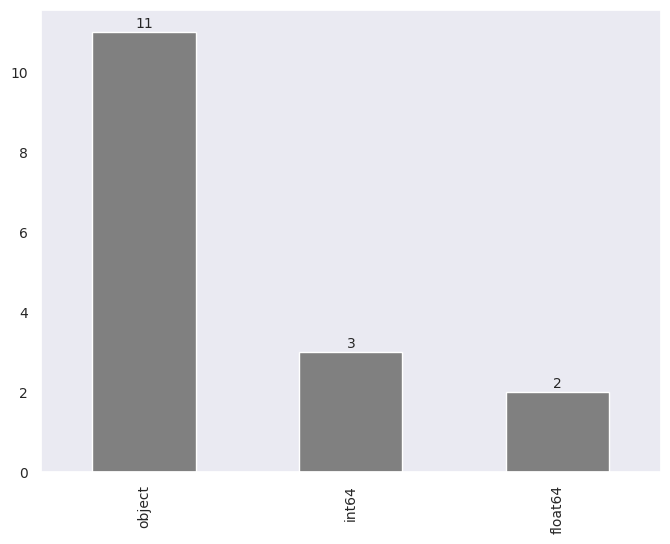

In [1208]:
plt.figure(figsize = (8,6))
ax = data.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=10,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 10)


In [1209]:
data.describe(include='object').T.style.set_properties(**{"background-color": "gray","color":"black","border": "1.5px solid black"})

,count,unique,top,freq
pathrise_status,2544,9,Placed,956
primary_track,2544,6,SWE,1678
cohort_tag,2536,47,JAN19A,132
employment_status,2315,5,Student,775
highest_level_of_education,2486,7,Bachelor's Degree,1361
length_of_job_search,2470,5,Less than one month,815
biggest_challenge_in_search,2520,10,Hearing back on my applications,1002
professional_experience,2322,4,1-2 years,882
work_authorization_status,2260,9,Citizen,1104
gender,2052,4,Male,1492


In [1210]:
data.describe(include=['int', 'float']).T.style.set_properties(**{"background-color": "gray","color":"black","border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
id,2544.000000,1272.500000,734.533866,1.000000,636.750000,1272.500000,1908.250000,2544.000000
program_duration_days,1928.000000,136.098548,125.860248,0.000000,14.000000,112.000000,224.000000,548.000000
placed,2544.000000,0.375786,0.484420,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_interviews,2326.000000,2.182287,2.959273,0.000000,0.000000,1.000000,3.000000,20.000000
number_of_applications,2544.000000,36.500786,53.654896,0.000000,9.000000,20.000000,45.000000,1000.000000


In [1211]:
print('the number of rows and columns is : ', data.shape)

the number of rows and columns is :  (2544, 16)


In [1212]:
prop_placed = round((data['placed'].sum() / data.shape[0]) * 100, 2)
print(f'{prop_placed}% of fellows were placed in companies.')

37.58% of fellows were placed in companies.


In [1213]:
pro_duration_0 = data[data['placed'] == 0]['program_duration_days'].mean()
pro_duration_1 = data[data['placed'] == 1]['program_duration_days'].mean()

job_search_0 = data[data['placed'] == 0]['length_of_job_search'].mode()[0]
job_search_1 = data[data['placed'] == 1]['length_of_job_search'].mode()[0]

print(pro_duration_0)
print(pro_duration_1)

print(job_search_0)
print(job_search_1)


111.48765432098766
161.1213389121339
Less than one month
1-2 months


In [1214]:
for i in data.columns:
  dis = len(data[i].unique())
  print(f'{i} - {dis}')

id - 2544
pathrise_status - 9
primary_track - 6
cohort_tag - 48
program_duration_days - 412
placed - 2
employment_status  - 6
highest_level_of_education - 8
length_of_job_search - 6
biggest_challenge_in_search - 11
professional_experience - 5
work_authorization_status - 10
number_of_interviews - 22
number_of_applications - 41
gender - 5
race - 10


In [1215]:
data.isna().sum().sort_values(ascending=False).to_frame().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,0
program_duration_days,616
gender,492
work_authorization_status,284
employment_status,229
professional_experience,222
number_of_interviews,218
length_of_job_search,74
highest_level_of_education,58
biggest_challenge_in_search,24
race,18


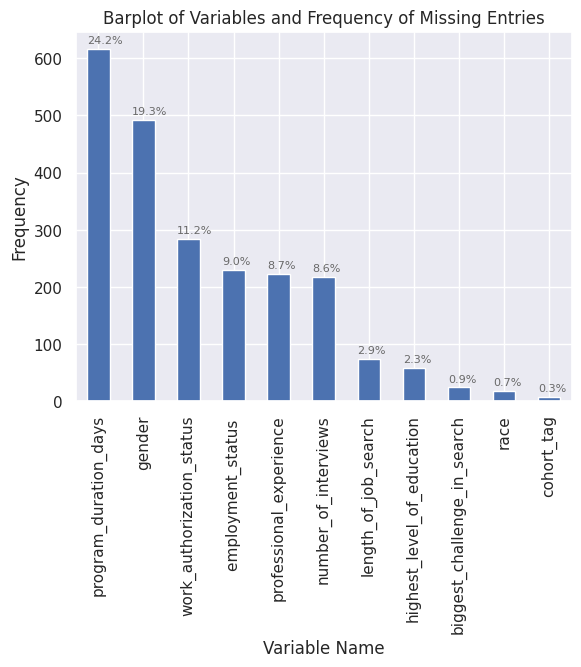

In [1216]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
ax = missing.plot(kind='bar')
ax.set_alpha(0.8)
ax.set_title("Barplot of Variables and Frequency of Missing Entries")
ax.set_ylabel("Frequency")
ax.set_xlabel('Variable Name')


for i in ax.patches:

     ax.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(data))*100, 1))+'%', fontsize=8,
                color='dimgrey')

In [1217]:
data['gender'].replace(np.nan, 'missing_gender', inplace=True)

In [1218]:
data['work_authorization_status'].fillna('MISSING_WORK_AUTH', inplace = True)

In [1219]:
data['employment_status '].replace(np.nan, 'missing_emply_status', inplace=True)

In [1220]:
data['professional_experience'].replace(np.nan, 'missing_pro_exp', inplace=True)

In [1221]:
def is_normal(data):

  _,p = stats.normaltest(data, nan_policy = 'omit')

  if p < 0.05:
        return False
  else:
        return True

In [1222]:
is_normal(data['number_of_interviews'])

False

In [1223]:
num_of_interviews_median = data['number_of_interviews'].median()

data['number_of_interviews'].replace(np.nan, num_of_interviews_median, inplace=True)

In [1224]:
data['length_of_job_search'].replace(np.nan, 'missing_job_searc', inplace=True)

In [1225]:
data['highest_level_of_education'].replace(np.nan, 'missing_edu_lvl', inplace=True)

In [1226]:
data['race'].replace(np.nan, data['race'].mode()[0], inplace=True)

In [1227]:
data['cohort_tag'].replace(np.nan, data['cohort_tag'].mode()[0], inplace=True)

In [1228]:
data['biggest_challenge_in_search'].replace(np.nan, data['biggest_challenge_in_search'].mode()[0], inplace=True)

In [1229]:
is_normal(data['program_duration_days'])

False

In [1230]:
pro_days_placed = round((100 * data[(data['program_duration_days'] == 0) & (data['placed'] == 1)].shape[0] / data[data['program_duration_days'].notnull()].shape[0]), 2)
print(pro_days_placed, '% of these fellows placed in a company')

pro_days_active = round((100 * data[(data['program_duration_days'] == 0) & (data['pathrise_status'] == 'Active')].shape[0] / data[data['program_duration_days'].notnull()].shape[0]), 2)
print(pro_days_active, '% of these fellows are Active')


pro_days_closed = round((100 * data[(data['program_duration_days'] == 0) & (data['pathrise_status'] == 'Closed Lost')].shape[0] / data[data['program_duration_days'].notnull()].shape[0]), 2)
print(pro_days_closed, '% of these fellows are Closed Lost')


0.05 % of these fellows placed in a company
0.0 % of these fellows are Active
9.44 % of these fellows are Closed Lost


((array([-3.45767769, -3.2110454 , -3.07449662, ...,  3.07449662,
          3.2110454 ,  3.45767769]),
  array([ 0.,  0.,  0., ..., nan, nan, nan])),
 (nan, nan, nan))

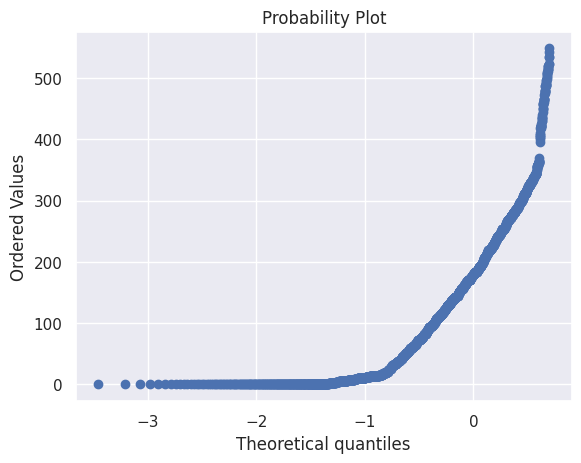

In [1231]:
from scipy import stats
stats.probplot(data['program_duration_days'], plot=plt)

In [1232]:
categ_vars = ['gender', 'race', 'pathrise_status', 'employment_status ',
              'highest_level_of_education', 'length_of_job_search',
              'professional_experience', 'work_authorization_status',
              'primary_track', 'cohort_tag', 'placed']

quant_vars = ['number_of_interviews', 'number_of_applications']

In [1233]:
impute_data = pd.get_dummies(data[categ_vars])

In [1234]:
impute_data.drop(columns=['pathrise_status_Placed'], inplace=True)

In [1235]:
impute_data[quant_vars] = data[quant_vars]

In [1236]:
impute_data['program_duration_days'] = data['program_duration_days']

In [1237]:
impute_data['program_duration_days'].isnull().sum()

616

In [1238]:
training_set = impute_data[impute_data['program_duration_days'].notnull()]
testing_set = impute_data[impute_data['program_duration_days'].isna()]

x_train = training_set.drop(columns=['program_duration_days'])
y_train = training_set['program_duration_days']

regmodel = LinearRegression()
regmodel.fit(x_train, y_train)

x_test = testing_set.drop(columns=['program_duration_days'])

regmodel.predict(x_test)[:10]

array([1.44026190e+10, 1.44026191e+10, 1.44026191e+10, 1.44026191e+10,
       1.44026191e+10, 1.44026191e+10, 1.44026191e+10, 1.44026191e+10,
       1.44026191e+10, 1.44026191e+10])

In [1239]:
clf = Lasso(alpha = 0.1)
clf.fit(x_train, y_train)


clf.predict(x_test)[0:10]

array([ 63.39918534, 109.75294513, 118.90038797, 130.93852691,
       123.38274523, 128.24099944, 107.50479991, 112.68517252,
       128.7888691 , 116.33743083])

In [1240]:
data.loc[testing_set.index.values, "program_duration_days"] = clf.predict(x_test)

In [1241]:
data['program_duration_days'].isnull().sum()

0

In [1242]:
data.isnull().sum()

id                             0
pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

Text(0.5, 1.0, 'number of applications')

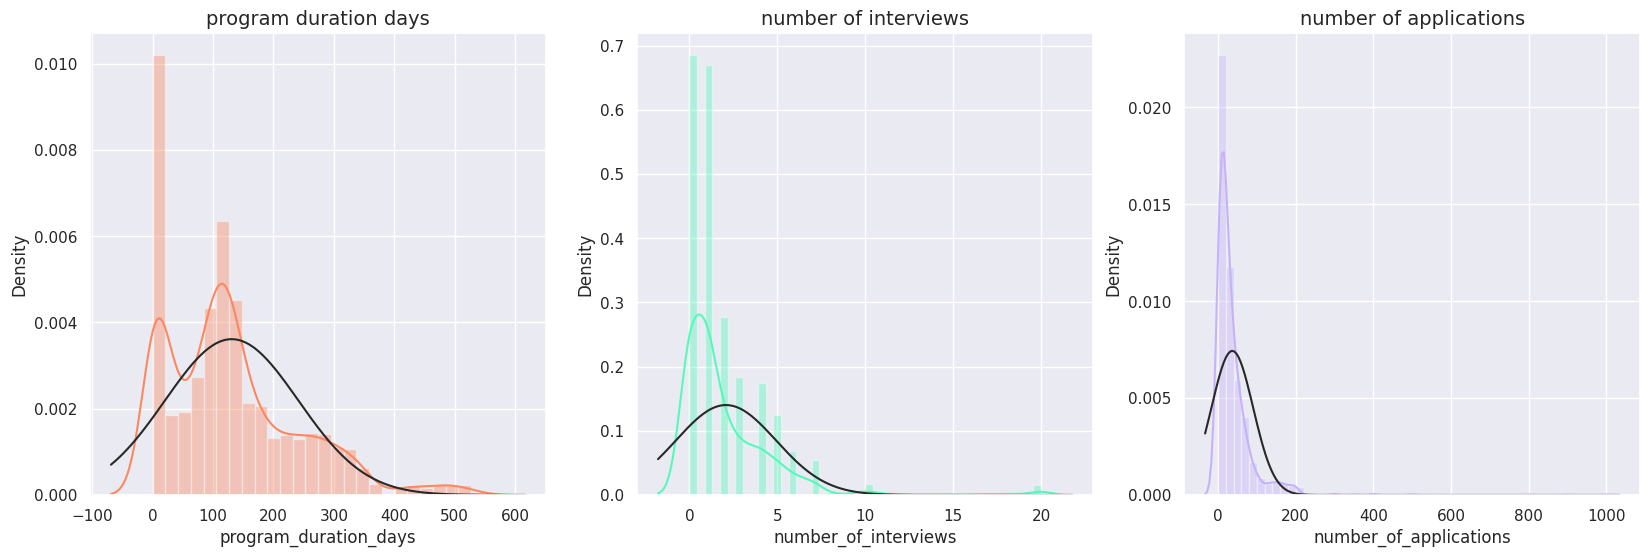

In [1243]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = data['program_duration_days']
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days', fontsize=14)

number_of_interviews = data['number_of_interviews']
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews', fontsize=14)

number_of_applications = data['number_of_applications']
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications', fontsize=14)

Text(0.5, 1.0, 'number of applications \n (placed)')

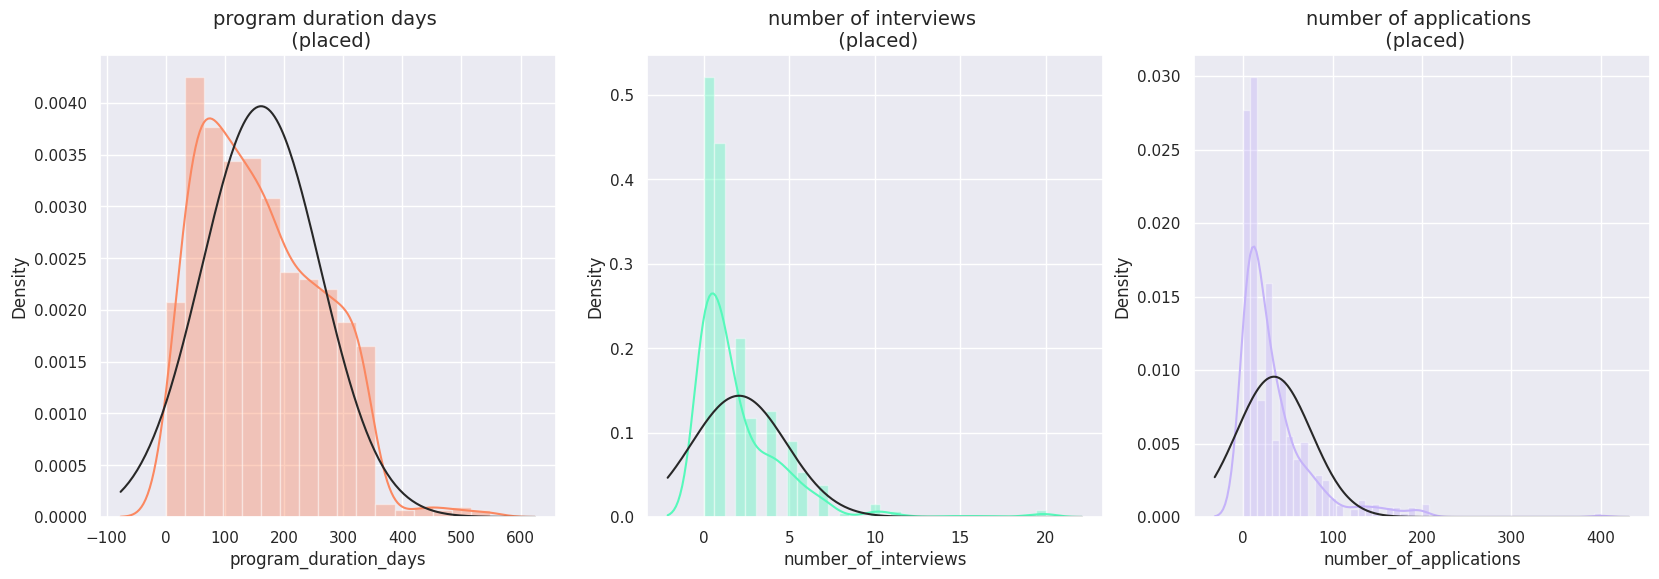

In [1244]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = data['program_duration_days'][data['placed'] == 1]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (placed)', fontsize=14)

number_of_interviews = data['number_of_interviews'][data['placed'] == 1]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (placed)', fontsize=14)

number_of_applications = data['number_of_applications'][data['placed'] == 1]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (placed)', fontsize=14)

Text(0.5, 1.0, 'number of applications \n (not placed)')

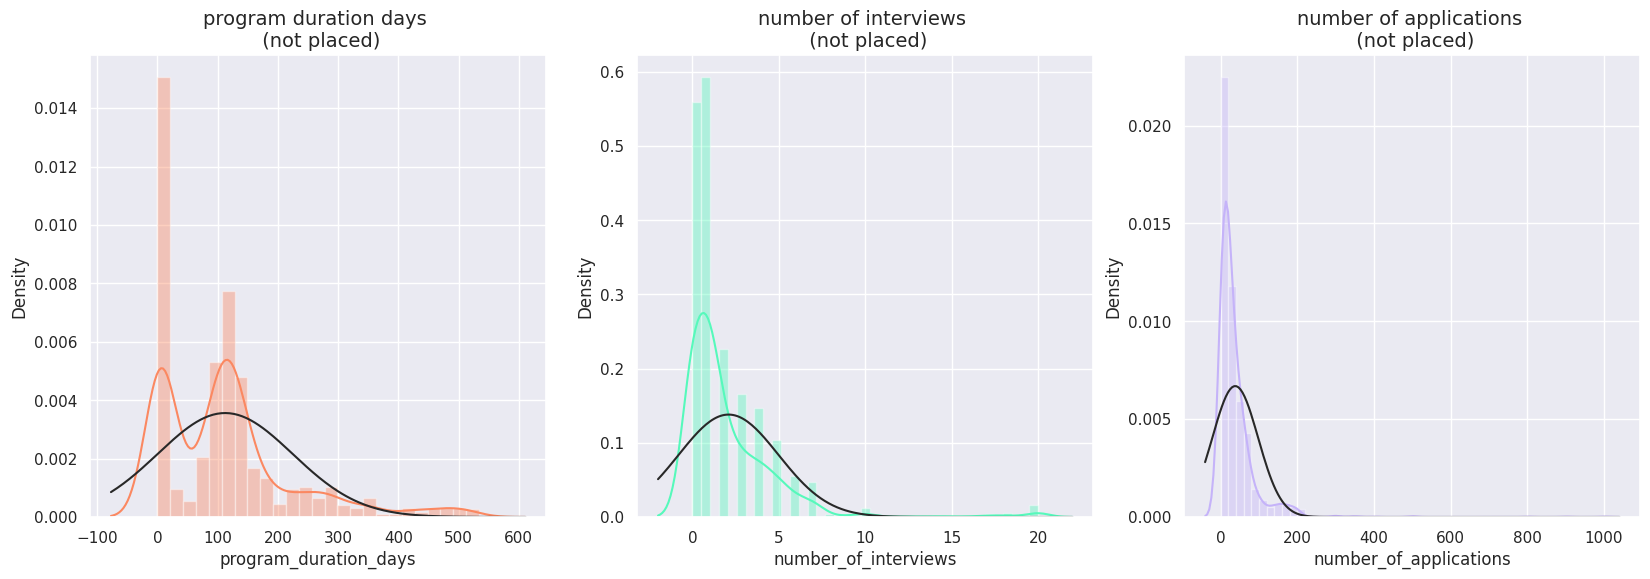

In [1245]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = data['program_duration_days'][data['placed'] == 0]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (not placed)', fontsize=14)

number_of_interviews = data['number_of_interviews'][data['placed'] == 0]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (not placed)', fontsize=14)

number_of_applications = data['number_of_applications'][data['placed'] == 0]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (not placed)', fontsize=14)

Text(0.5, 1.0, 'V10 Feature \n Reduction of outliers')

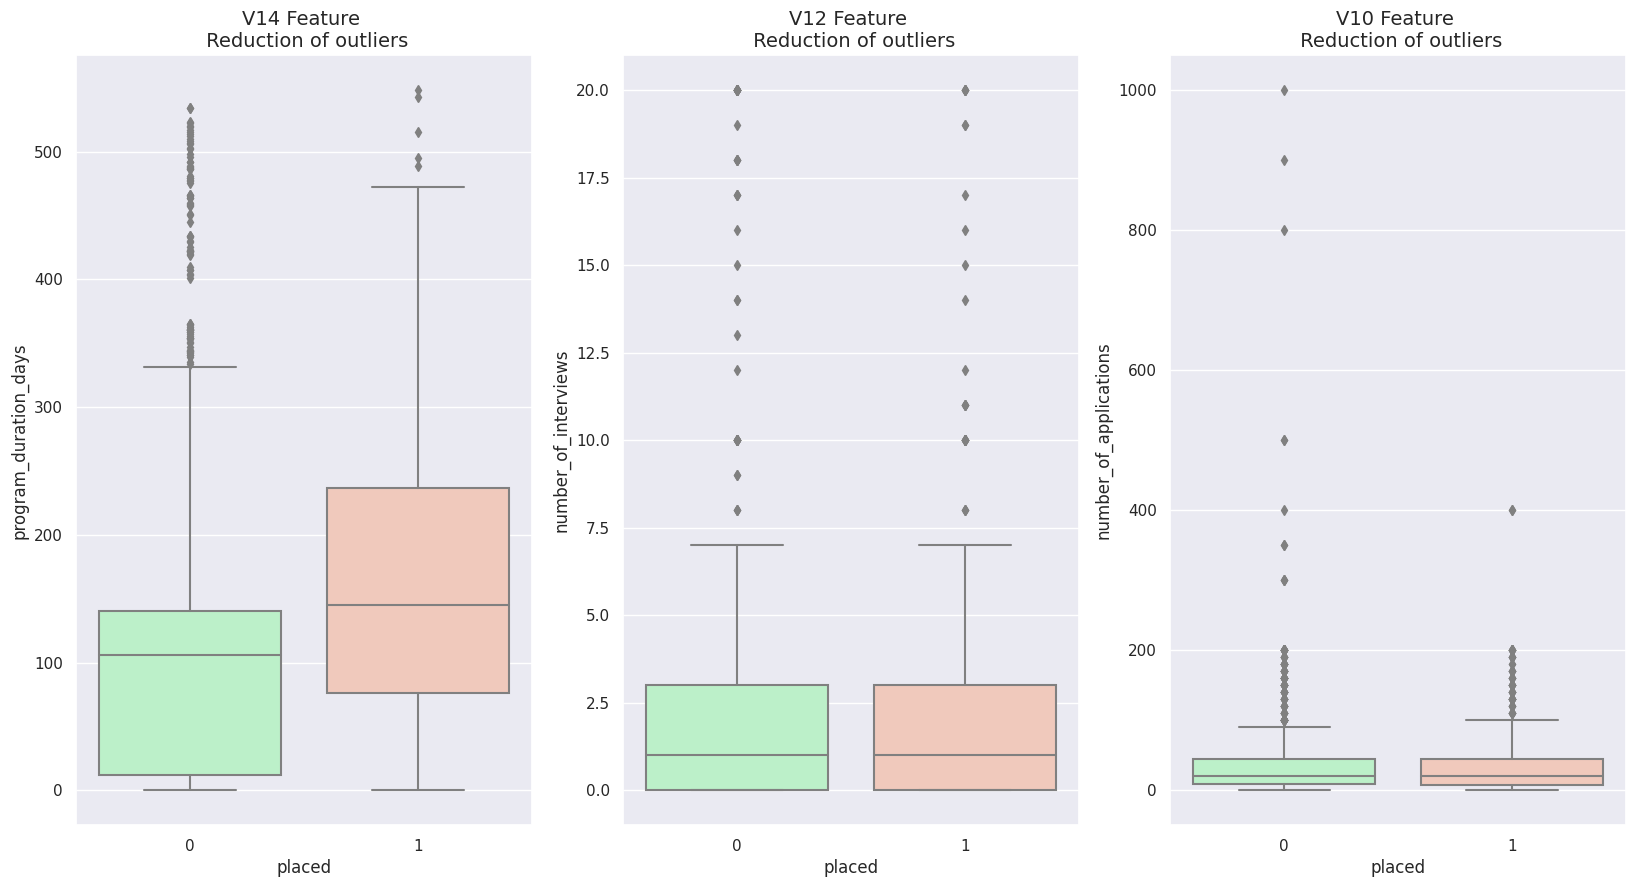

In [1246]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x='placed', y='program_duration_days', data=data, palette=colors, ax=ax1)
ax1.set_title("program_duration_days", fontsize=14)


sns.boxplot(x='placed', y='number_of_interviews', data=data, palette=colors, ax=ax2)
ax2.set_title("number_of_interviews", fontsize=14)


sns.boxplot(x='placed', y='number_of_applications', data=data, palette=colors, ax=ax3)
ax3.set_title("number_of_applications", fontsize=14)


In [1247]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Count plot', 'pie plot'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=True,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    fig.update_yaxes(title_text="count", row=1, col=1)

    fig.update_layout(width=900, height=600)

    fig.show()

In [1248]:
categorical_features = ['pathrise_status', 'primary_track' ,'employment_status ', 'highest_level_of_education',
                        'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
                        'gender', 'race', 'placed']

for col in categorical_features:
    cat_summary_with_graph(data,col)

In [1249]:
def plot_histgram(feature):
    fig = px.histogram(data, x=feature,
                       color="placed",
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="white",
        plot_bgcolor='white',
        font_color="black"
    )
    fig.show()

In [1250]:
# categorical_features = ['pathrise_status', 'primary_track' ,'employment_status ', 'highest_level_of_education',
#                         'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
#                         'gender', 'race', 'cohort_tag']

# for col in categorical_features:
#     plot_histgram(col)

--------------------------------------------------------------------------------------------------------------


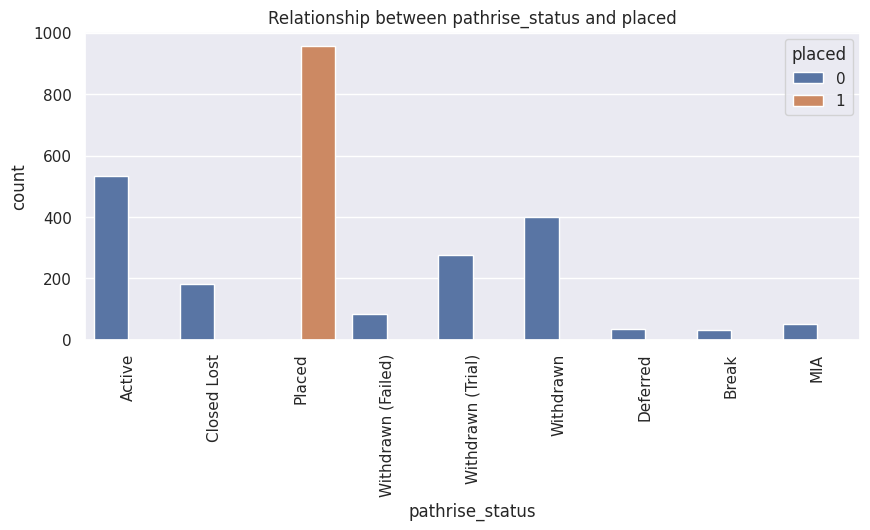

--------------------------------------------------------------------------------------------------------------


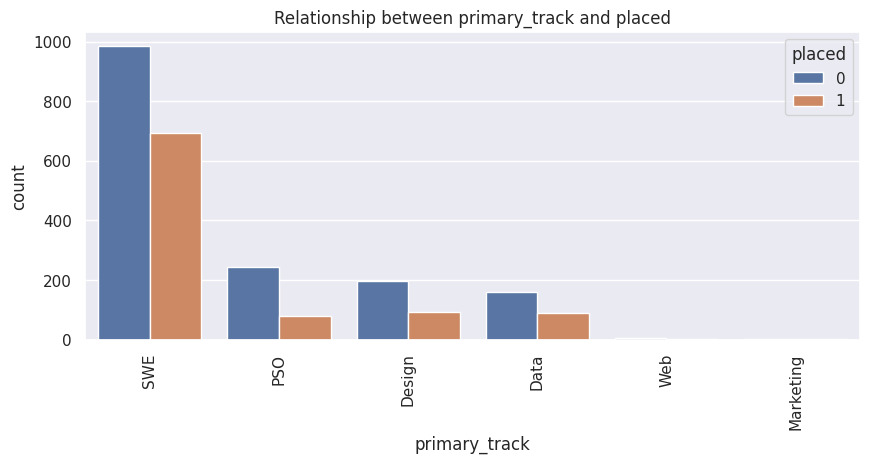

--------------------------------------------------------------------------------------------------------------


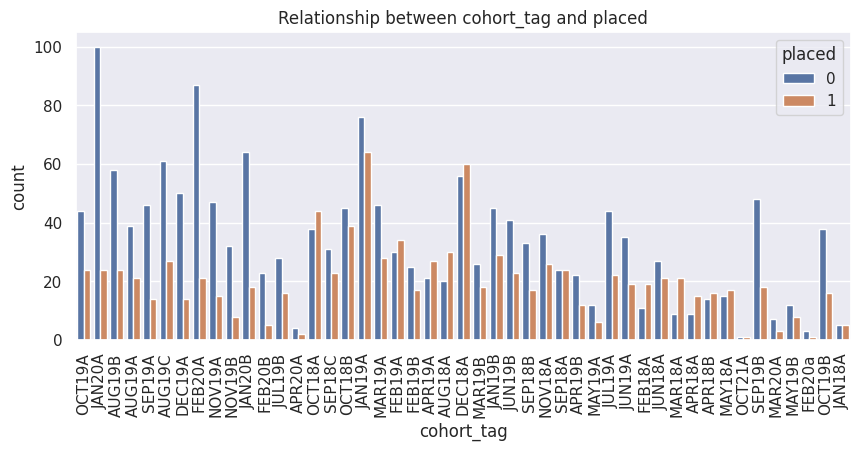

--------------------------------------------------------------------------------------------------------------


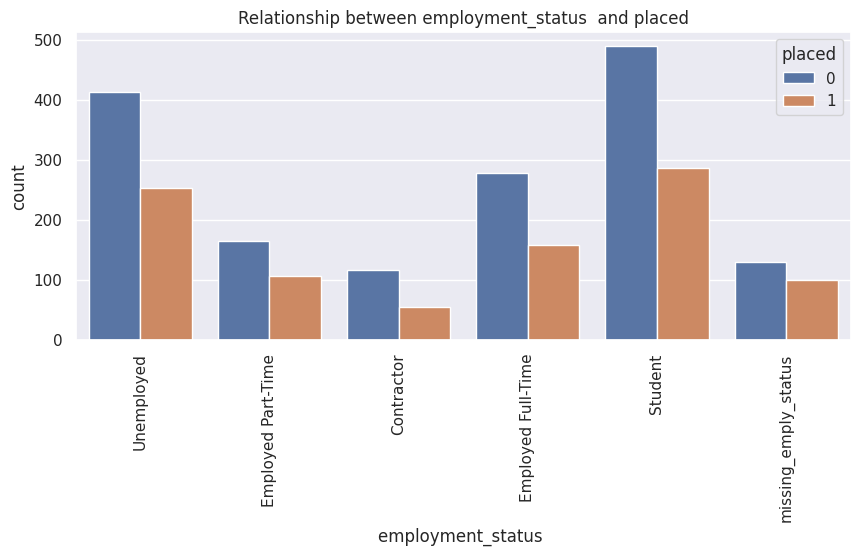

--------------------------------------------------------------------------------------------------------------


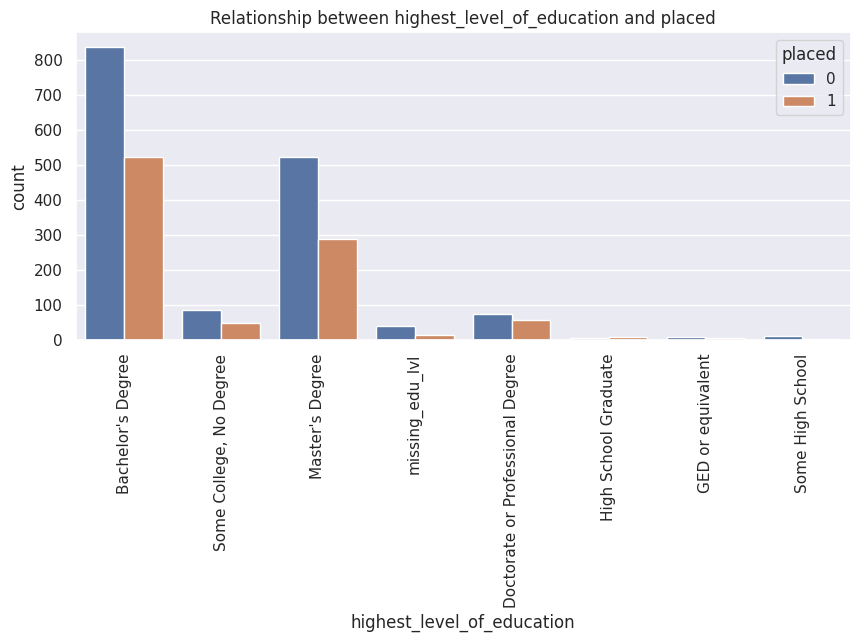

--------------------------------------------------------------------------------------------------------------


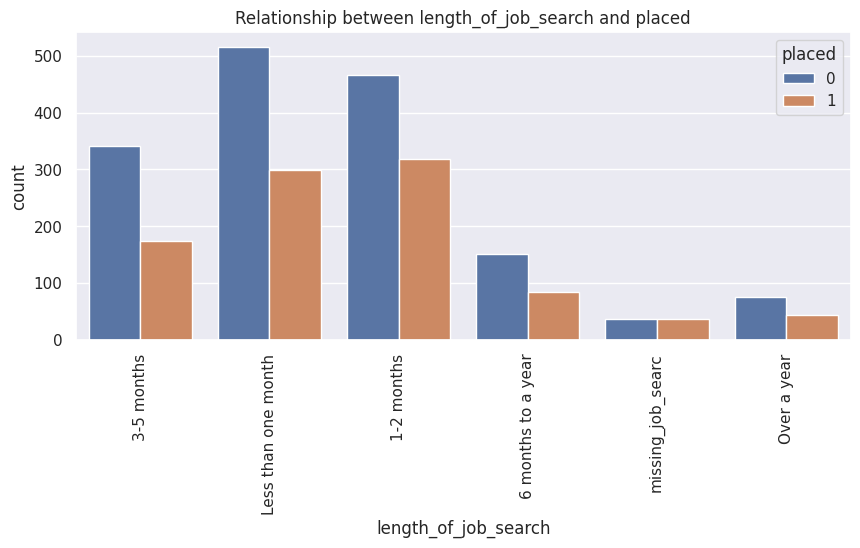

--------------------------------------------------------------------------------------------------------------


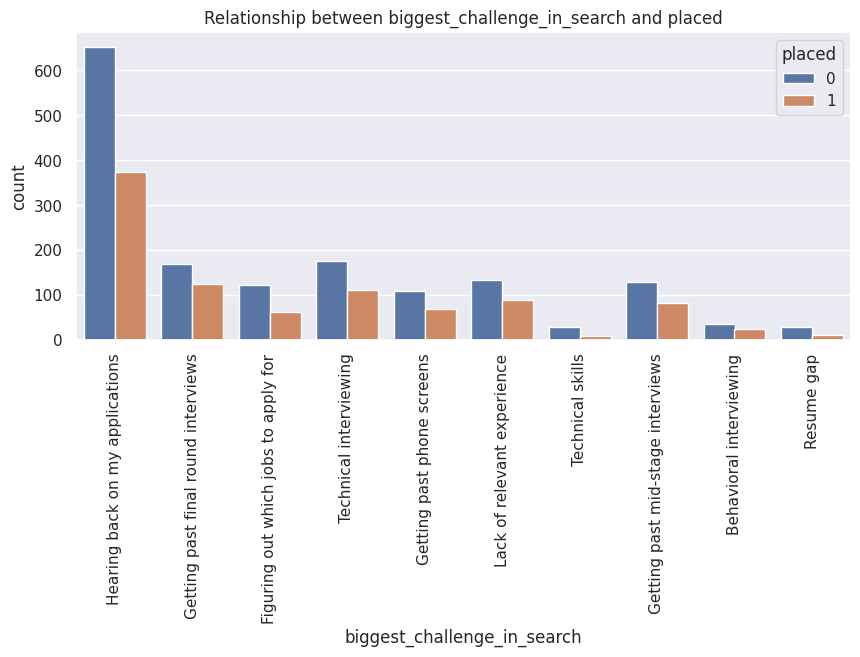

--------------------------------------------------------------------------------------------------------------


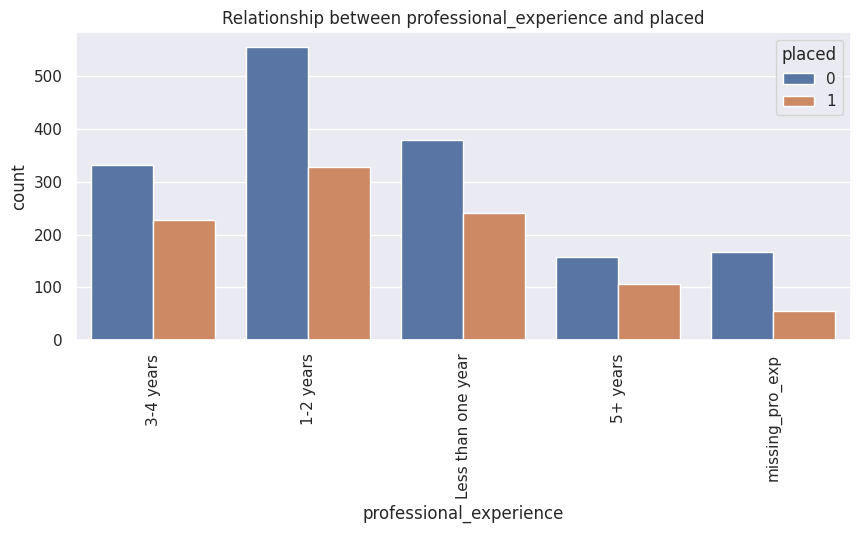

--------------------------------------------------------------------------------------------------------------


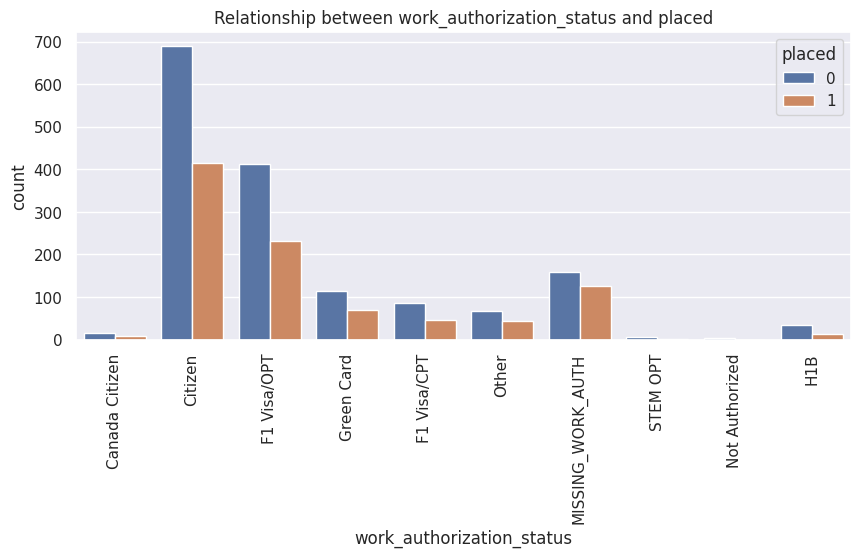

--------------------------------------------------------------------------------------------------------------


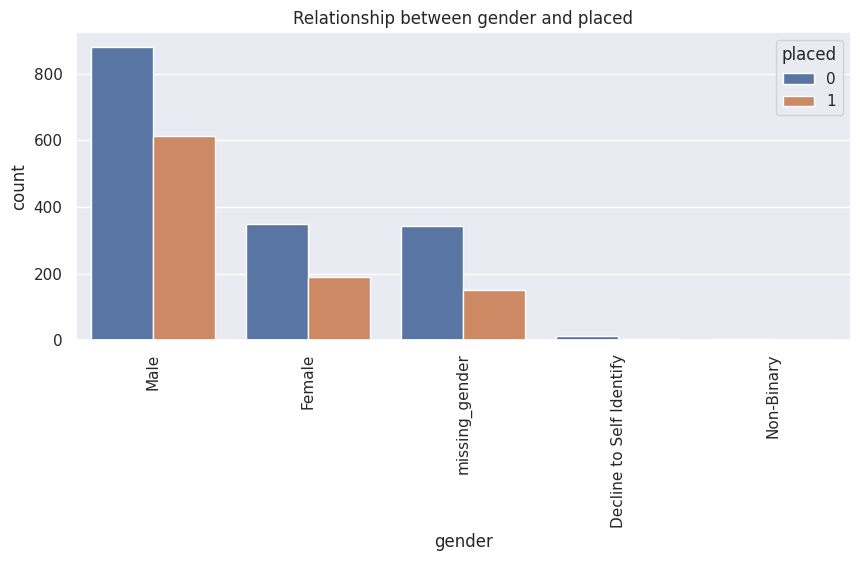

--------------------------------------------------------------------------------------------------------------


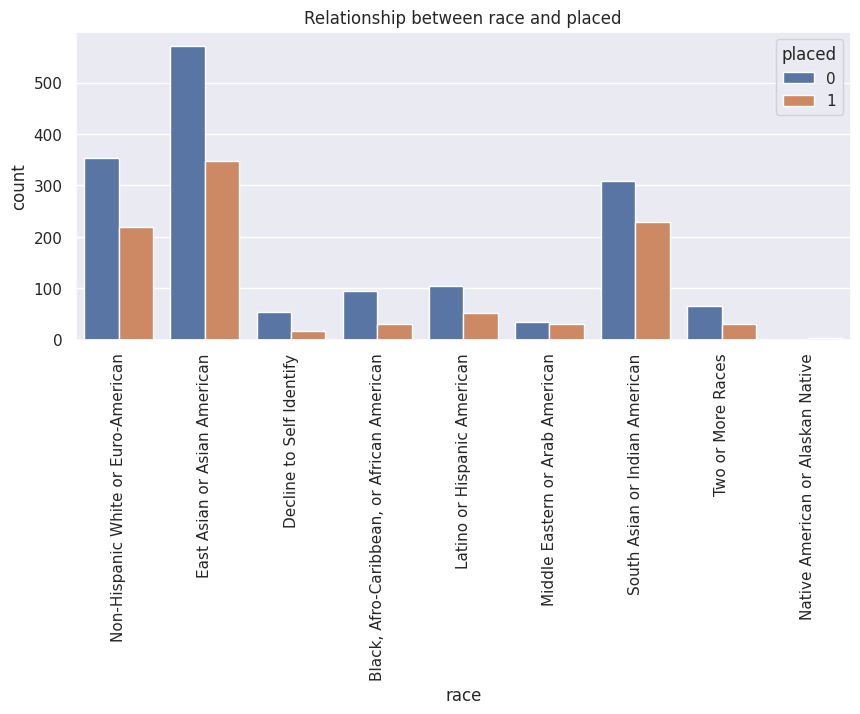

In [1251]:
selective_features = ['pathrise_status', 'primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education',
                        'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
                        'gender', 'race']

target_features = ['placed']


for feature in target_features:

  for selective in selective_features:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=selective, hue=feature)
        print('--------------------------------------------------------------------------------------------------------------')
        plt.title('Relationship between ' + selective + ' and ' + feature)
        plt.xticks(rotation=90)
        plt.show()


In [1252]:
data['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A'], dtype=object)

In [1253]:
print(len(data['cohort_tag'].unique()))

47


In [1254]:
data = data.replace({'cohort_tag' : {'FEB20a' : 'FEB20A'}})

In [1255]:
data[data['cohort_tag'] == 'OCT21A']

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
364,365,Withdrawn,SWE,OCT21A,222.0,0,Employed Full-Time,Doctorate or Professional Degree,3-5 months,Hearing back on my applications,3-4 years,Citizen,2.0,40,Male,East Asian or Asian American
2400,2401,Placed,SWE,OCT21A,257.0,1,Employed Full-Time,Bachelor's Degree,1-2 months,Lack of relevant experience,3-4 years,F1 Visa/CPT,0.0,3,Female,Non-Hispanic White or Euro-American


In [1256]:
data.drop(data[data['cohort_tag'] == 'OCT21A'].index, inplace=True)
print(len(data['cohort_tag'].unique()))

45


In [1257]:
def create_years_in_cohort(cohort_tag):

  cohort_year = int(cohort_tag[3:5])
  return 20 - cohort_year

In [1258]:
data['years_in_cohort'] = data['cohort_tag'].apply(create_years_in_cohort)

In [1259]:
data['years_in_cohort'].describe()

count    2542.000000
mean        1.152636
std         0.643674
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: years_in_cohort, dtype: float64

Text(0, 0.5, 'Frequency')

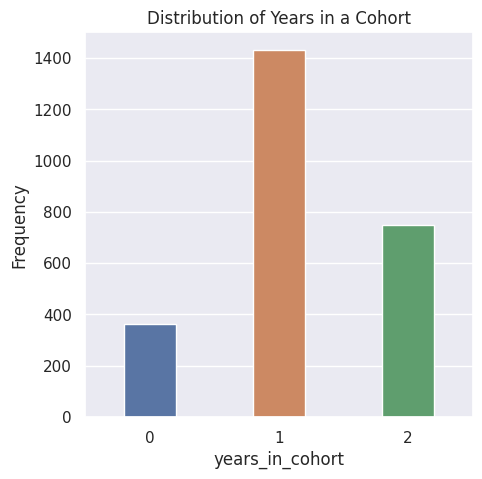

In [1260]:
plt.figure(figsize=(5,5))
sns.countplot(x='years_in_cohort', data=data, width=0.4)
plt.title('Distribution of Years in a Cohort')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

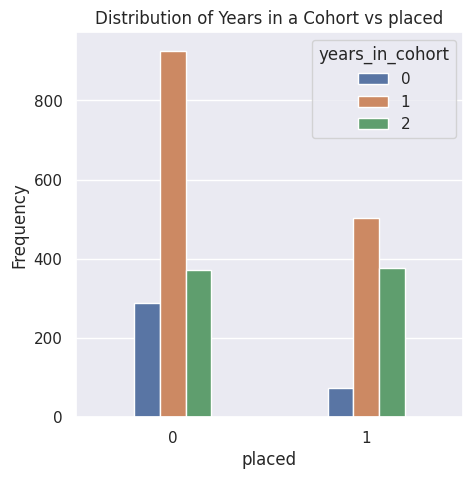

In [1261]:
plt.figure(figsize=(5,5))
sns.countplot(x='placed', data=data, width=0.4, hue='years_in_cohort')
plt.title('Distribution of Years in a Cohort vs placed')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of Spending 0 , 1 and 2 Years in a Cohort and Days in the Program')

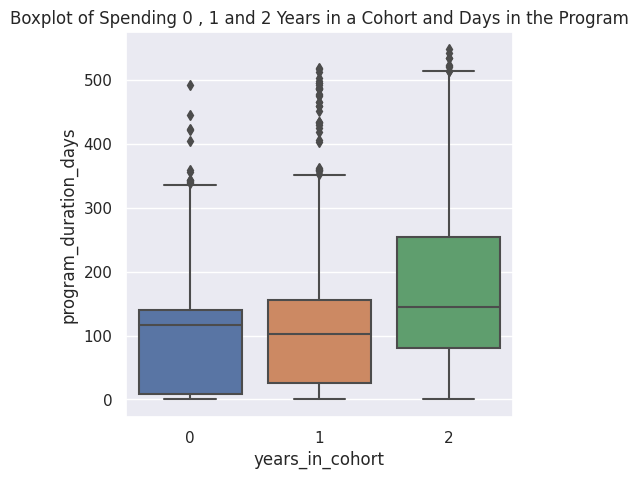

In [1262]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['years_in_cohort'], y=data['program_duration_days'])
plt.title('Boxplot of Spending 0 , 1 and 2 Years in a Cohort and Days in the Program')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Active'),
  Text(1, 0, 'Closed Lost'),
  Text(2, 0, 'Placed'),
  Text(3, 0, 'Withdrawn (Failed)'),
  Text(4, 0, 'Withdrawn (Trial)'),
  Text(5, 0, 'Withdrawn'),
  Text(6, 0, 'Deferred'),
  Text(7, 0, 'Break'),
  Text(8, 0, 'MIA')])

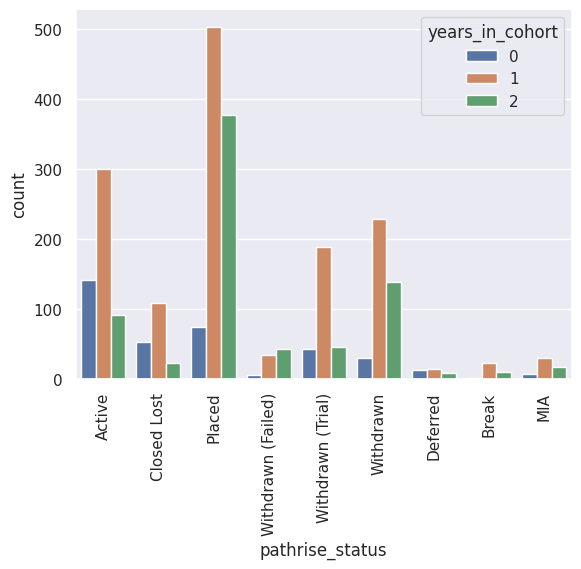

In [1263]:
sns.countplot(x='pathrise_status', data=data, hue='years_in_cohort')
plt.xticks(rotation=90)

In [1264]:
placed_with_zero = data[(data['years_in_cohort'] == 0) & (data['placed'] == 1)]['program_duration_days'].mean()
print(f'Placed fellows with 0 years in a cohort spent {int(placed_with_zero)} days on average in the program')

Placed fellows with 0 years in a cohort spent 189 days on average in the program


In [1265]:
placed_with_one = data[(data['years_in_cohort'] == 1) & (data['placed'] == 1)]['program_duration_days'].mean()
print(f'Placed fellows with 1 years in a cohort spent {int(placed_with_one)} days on average in the program')

Placed fellows with 1 years in a cohort spent 149 days on average in the program


In [1266]:
placed_with_two = data[(data['years_in_cohort'] == 2) & (data['placed'] == 1)]['program_duration_days'].mean()
print(f'Placed fellows with 2 years in a cohort spent {int(placed_with_two)} days on average in the program')

Placed fellows with 2 years in a cohort spent 171 days on average in the program


In [1267]:
data['number_of_interviews'].describe()

count    2542.000000
mean        2.081825
std         2.849704
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        20.000000
Name: number_of_interviews, dtype: float64

Text(0, 0.5, 'Frequency')

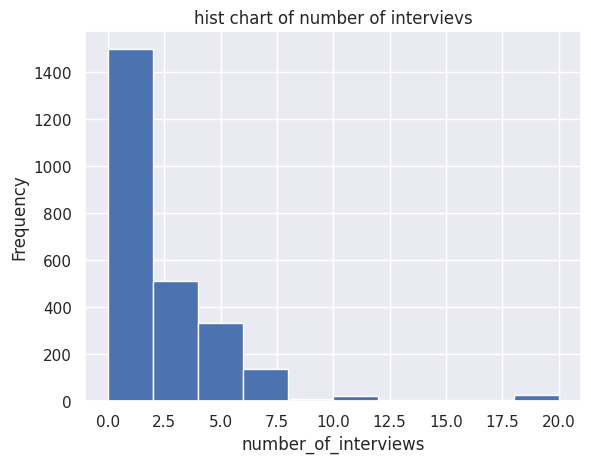

In [1268]:
data['number_of_interviews'].hist()

plt.title('hist chart of number of intervievs')
plt.xlabel('number_of_interviews')
plt.ylabel('Frequency')

In [1269]:
print("is this distribution normal?", is_normal(data['number_of_interviews']))
print('Skewness:', data['number_of_interviews'].skew())
print('Kurtosis:', data['number_of_interviews'].kurtosis())

is this distribution normal? False
Skewness: 3.2092892847702994
Kurtosis: 14.78515863099173


Text(0, 0.5, 'Frequency')

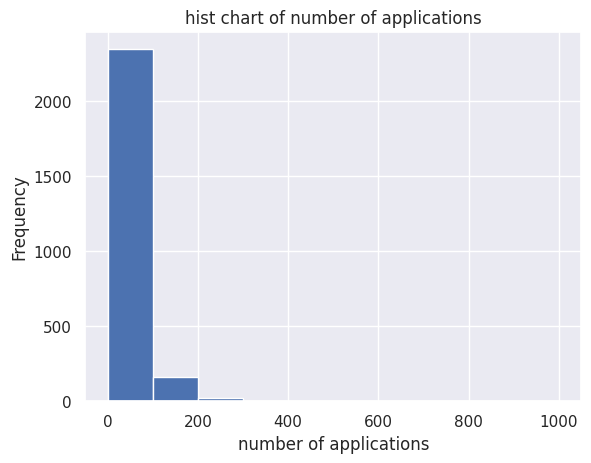

In [1270]:
data['number_of_applications'].hist()

plt.title('hist chart of number of applications')
plt.xlabel('number of applications')
plt.ylabel('Frequency')

In [1271]:
print("is this distribution normal?", is_normal(data['number_of_applications']))
print('Skewness:', data['number_of_applications'].skew())
print('Kurtosis:', data['number_of_applications'].kurtosis())

is this distribution normal? False
Skewness: 6.970711111532388
Kurtosis: 91.08445018495051


In [1272]:
categ_vars = ['gender', 'race', 'pathrise_status', 'employment_status ',
              'highest_level_of_education', 'length_of_job_search',
              'professional_experience', 'work_authorization_status',
              'primary_track', 'cohort_tag']



square_test_on_cat_vars = []

for categ_var in categ_vars:
  crosstab = pd.crosstab(data[categ_var], data['placed'], margins=False)
  stat, p, dof, expected = stats.chi2_contingency(crosstab.values)

  if p < 0.05 :
    square_test_on_cat_vars.append(categ_var)


In [1273]:
square_test_on_cat_vars

['gender',
 'race',
 'pathrise_status',
 'length_of_job_search',
 'professional_experience',
 'primary_track',
 'cohort_tag']

In [1274]:
square_test_on_cat_vars_2 = []

for categ_var in categ_vars:
  crosstab = pd.crosstab(data[categ_var], data['program_duration_days'], margins=False)
  stat, p, dof, expected = stats.chi2_contingency(crosstab.values)

  if p < 0.05:
    square_test_on_cat_vars_2.append(categ_var)

In [1275]:
square_test_on_cat_vars_2

['gender', 'pathrise_status', 'cohort_tag']

In [1276]:
def determine_sig_anova(categ_var, dv):


    levels = data[categ_var].unique()
    all_types = []
    for level in levels:
        prog_dur_days = data[data[categ_var] == level][dv].values
        all_types.append(prog_dur_days)


    pval = stats.f_oneway(*all_types)[1]
    if pval < 0.05:
        return True
    else:
        return False

In [1277]:
stat_sig_categ_vars_place_time = [] # Holds statistically significant variables for regression problem

for categ_var in categ_vars:
    if determine_sig_anova(categ_var, 'program_duration_days'):
        stat_sig_categ_vars_place_time.append(categ_var)

In [1278]:
stat_sig_categ_vars_place_time

['gender', 'pathrise_status', 'cohort_tag']

In [1279]:
data.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
years_in_cohort                  int64
dtype: object

In [1280]:
quant_vars = ['program_duration_days', 'number_of_interviews', 'number_of_applications', 'years_in_cohort']

stat_sig_quant_vars_placed = []


for quant_var in quant_vars:
    if determine_sig_anova('placed', quant_var):
        stat_sig_quant_vars_placed.append(quant_var)

In [1281]:
stat_sig_quant_vars_placed

['program_duration_days', 'years_in_cohort']

In [1282]:
quant_vars_2 = ['number_of_interviews', 'number_of_applications', 'years_in_cohort']

stat_sig_quant_vars_placed_2 = []

for quant_var in quant_vars_2:
    if determine_sig_anova('program_duration_days', quant_var):
        stat_sig_quant_vars_placed_2.append(quant_var)


In [1283]:
stat_sig_quant_vars_placed_2

['years_in_cohort']

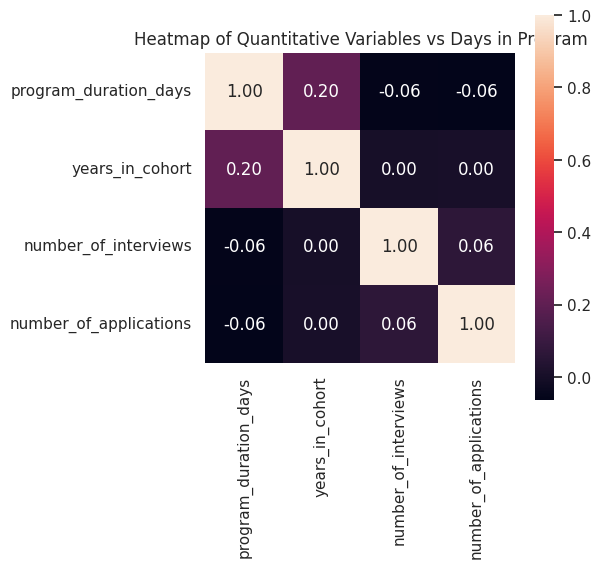

In [1284]:
import seaborn as sns
corrmat = data[['program_duration_days', 'number_of_interviews', 'number_of_applications', 'years_in_cohort']].corr()

f, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Heatmap of Quantitative Variables vs Days in Program')
k = 10
cols = corrmat.nlargest(k, 'program_duration_days')['program_duration_days'].index
cm = np.corrcoef(data[cols].values.T)

hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1285]:
is_normal(data['years_in_cohort'])

False

In [1286]:
is_normal(data['program_duration_days'])

False

In [1287]:
program_duration = ['gender', 'pathrise_status', 'cohort_tag', 'years_in_cohort']

placed = ['gender', 'race', 'pathrise_status', 'length_of_job_search', 'professional_experience',
          'primary_track', 'cohort_tag', 'program_duration_days', 'years_in_cohort']

remains_columns = ['gender', 'race', 'pathrise_status', 'length_of_job_search', 'professional_experience',
          'primary_track' ,'program_duration_days','gender', 'pathrise_status', 'cohort_tag', 'years_in_cohort']


data.columns

data = data.drop(columns=['id', 'employment_status ', 'highest_level_of_education',
                          'number_of_interviews', 'number_of_applications', 'work_authorization_status'])

In [1288]:
data.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience', 'gender',
       'race', 'years_in_cohort'],
      dtype='object')

In [1289]:
placed = data['program_duration_days'][data['placed'] == 0]
q25, q75 = np.percentile(placed, 25), np.percentile(placed, 75)
print('quartile 25 : {} | quartile 75 : {}'.format(q25, q75))

placed_iqr = q75 - q25
print('placed_iqr : {}'.format(placed_iqr))

placed_cut_of = 1.5 * placed_iqr
placed_lower, placed_upper = q25 - placed_cut_of, q75 + placed_cut_of
print('placed_cut : {}'.format(placed_cut_of))
print('placed_lower : {}'.format(placed_lower))
print('placed_upper : {}'.format(placed_upper))
outliers = [x for x in placed if x < placed_lower or x > placed_upper]
print('Feature program_duration days Outliers for placed Cases: {}'.format(len(outliers)))
print('program_duration_days outliers:{}'.format(outliers))

quartile 25 : 12.0 | quartile 75 : 140.22010523698876
placed_iqr : 128.22010523698876
placed_cut : 192.33015785548315
placed_lower : -180.33015785548315
placed_upper : 332.55026309247194
Feature program_duration days Outliers for placed Cases: 92
program_duration_days outliers:[430.0, 520.0, 478.0, 401.0, 354.0, 420.0, 354.0, 458.0, 345.0, 347.0, 512.0, 434.0, 451.0, 489.0, 410.0, 359.0, 515.0, 507.0, 422.0, 465.0, 464.0, 502.0, 523.0, 365.0, 354.0, 534.0, 534.0, 365.0, 360.0, 407.0, 445.0, 506.0, 450.0, 360.0, 466.0, 486.0, 361.0, 356.0, 429.0, 404.0, 479.0, 344.0, 522.0, 503.0, 464.0, 421.0, 434.0, 481.0, 341.0, 459.0, 423.0, 514.0, 475.0, 357.0, 343.0, 342.0, 350.0, 496.0, 364.0, 353.0, 486.0, 492.0, 422.0, 510.0, 344.0, 492.0, 519.0, 360.0, 460.0, 517.0, 351.0, 359.0, 477.0, 498.0, 335.0, 361.0, 339.0, 508.0, 487.0, 479.0, 407.0, 433.0, 334.0, 419.0, 341.0, 403.0, 422.0, 363.0, 425.0, 466.0, 457.0, 488.0]


In [1290]:

data = data.drop(data[(data['program_duration_days'] > placed_upper) | (data['program_duration_days'] < placed_lower)].index)

<Axes: xlabel='placed', ylabel='program_duration_days'>

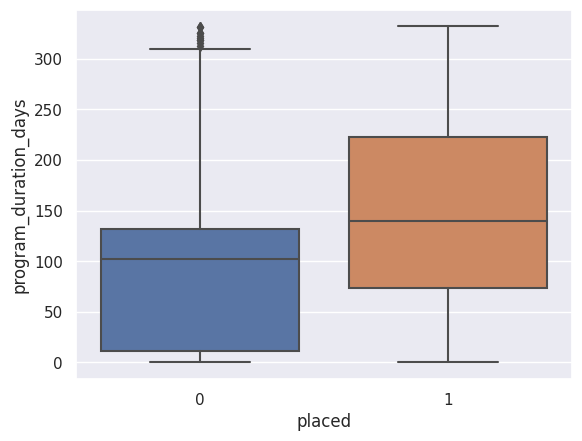

In [1291]:
# placed = new_data['program_duration_days'][new_data['placed'] == 1]
# placed_1 = new_data['program_duration_days'][new_data['placed'] == 0]

sns.boxplot(x='placed', y='program_duration_days', data=data)

In [1292]:
data.shape

(2413, 11)

In [1293]:
data['placed'].value_counts()

0    1495
1     918
Name: placed, dtype: int64

In [1294]:
rscaler = RobustScaler()

In [1295]:
data['program_duration_days'] = rscaler.fit_transform(data['program_duration_days'].values.reshape(-1,1))

Text(0.5, 1.0, 'program_duration_days Distribution \n (not_placed)')

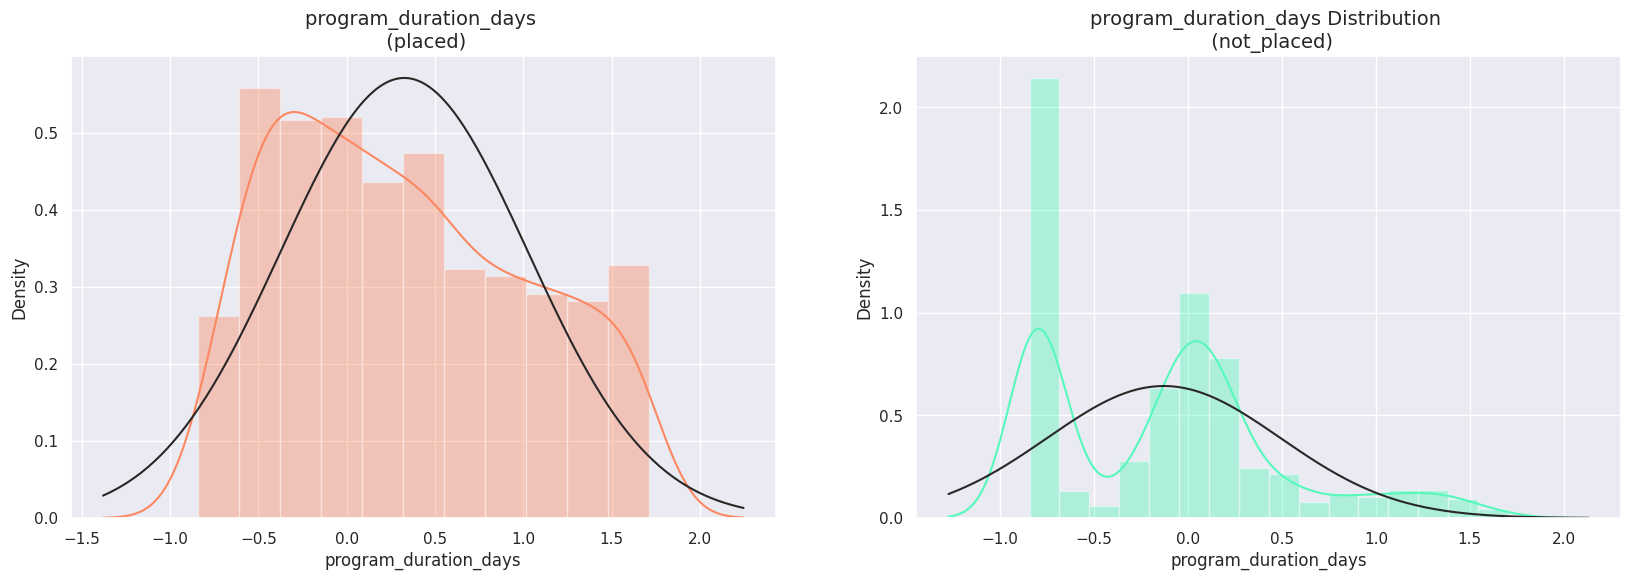

In [1414]:
from scipy.stats import norm
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

placed = data['program_duration_days'][data['placed'] == 1]
sns.distplot(placed, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program_duration_days Distribution \n (placed)', fontsize=14)

not_placed = data['program_duration_days'][data['placed'] == 0]
sns.distplot(not_placed, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('program_duration_days Distribution \n (not_placed)', fontsize=14)

In [1300]:
categ_vars = ['pathrise_status']

In [1301]:
data_dummy = pd.get_dummies(data[categ_vars])

In [1302]:
data_dummy.drop(columns=['pathrise_status_Placed'], inplace=True)

In [1303]:
data.drop(columns=['pathrise_status'], inplace=True)

In [1304]:
data = pd.concat([data, data_dummy], axis=1)

In [1318]:
data.columns

Index(['primary_track', 'cohort_tag', 'program_duration_days',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'gender', 'race', 'years_in_cohort',
       'placed', 'pathrise_status_Active', 'pathrise_status_Break',
       'pathrise_status_Closed Lost', 'pathrise_status_Deferred',
       'pathrise_status_MIA', 'pathrise_status_Withdrawn',
       'pathrise_status_Withdrawn (Failed)',
       'pathrise_status_Withdrawn (Trial)'],
      dtype='object')

In [1315]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data[['primary_track', 'cohort_tag', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'gender', 'race']]:
    data[col] = le.fit_transform(data[col])

In [1320]:
data.head()

,primary_track,cohort_tag,program_duration_days,length_of_job_search,biggest_challenge_in_search,professional_experience,gender,race,years_in_cohort,placed,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial)
0,4,38,-0.355984,1,5,1,2,6,1,0,1,0,0,0,0,0,0,0
1,3,19,0.000584,1,2,0,2,6,0,0,1,0,0,0,0,0,0,0
2,1,7,-0.843670,3,1,3,2,2,1,0,0,0,1,0,0,0,0,0
3,3,7,-0.843670,3,2,3,2,1,1,0,0,0,1,0,0,0,0,0
4,4,6,-0.159054,0,5,0,2,2,1,1,0,0,0,0,0,0,0,0


In [1323]:
placed = data['placed']

data.drop(['placed'], axis=1, inplace=True)
data.insert(17, 'placed', placed)

In [1325]:
data.columns

Index(['primary_track', 'cohort_tag', 'program_duration_days',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'gender', 'race', 'years_in_cohort',
       'pathrise_status_Active', 'pathrise_status_Break',
       'pathrise_status_Closed Lost', 'pathrise_status_Deferred',
       'pathrise_status_MIA', 'pathrise_status_Withdrawn',
       'pathrise_status_Withdrawn (Failed)',
       'pathrise_status_Withdrawn (Trial)', 'placed'],
      dtype='object')

In [1316]:
x = data.drop(columns=['placed'])
y = data['placed']

In [1327]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [1328]:
y_train.value_counts()

0    1189
1     741
Name: placed, dtype: int64

<Axes: xlabel='placed', ylabel='program_duration_days'>

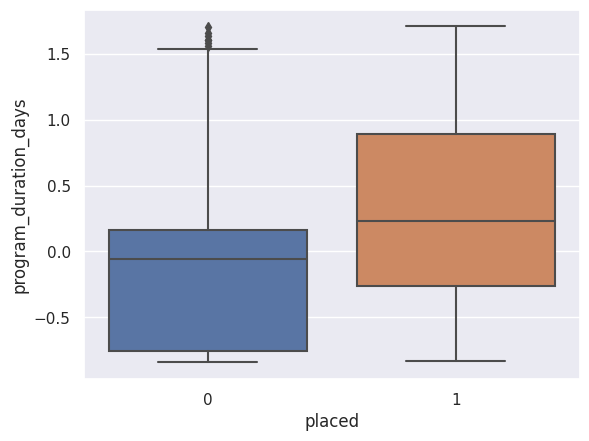

In [1396]:
data_without_balanced = pd.concat([x_train, y_train], axis=1)


sns.boxplot(x='placed', y='program_duration_days', data=data_without_balanced)

In [1397]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train, y_train)
  training_score = cross_val_score(classifier, x_test, y_test, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score


In [1398]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNeighborsClassifier model
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_

In [1399]:
methods = []
scores = []

log_reg_score = cross_val_score(log_reg, x_test, y_test, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
methods.append('Logistic Regression')
scores.append(round(log_reg_score.mean() * 100, 2))

knears_score = cross_val_score(knears_neighbors, x_test, y_test, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
methods.append('Knears Neighbors')
scores.append(round(knears_score.mean() * 100, 2))

svc_score = cross_val_score(svc, x_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
methods.append('Support Vector Classifier')
scores.append(round(svc_score.mean() * 100, 2))

tree_score = cross_val_score(tree_clf, x_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
methods.append('DecisionTree Classifier')
scores.append(round(tree_score.mean() * 100, 2))

Logistic Regression Cross Validation Score:  99.79%
Knears Neighbors Cross Validation Score 62.74%
Support Vector Classifier Cross Validation Score 99.58%
DecisionTree Classifier Cross Validation Score 93.59%


In [1400]:
print(methods)
print(scores)

['Logistic Regression', 'Knears Neighbors', 'Support Vector Classifier', 'DecisionTree Classifier']
[99.79, 62.74, 99.58, 93.59]


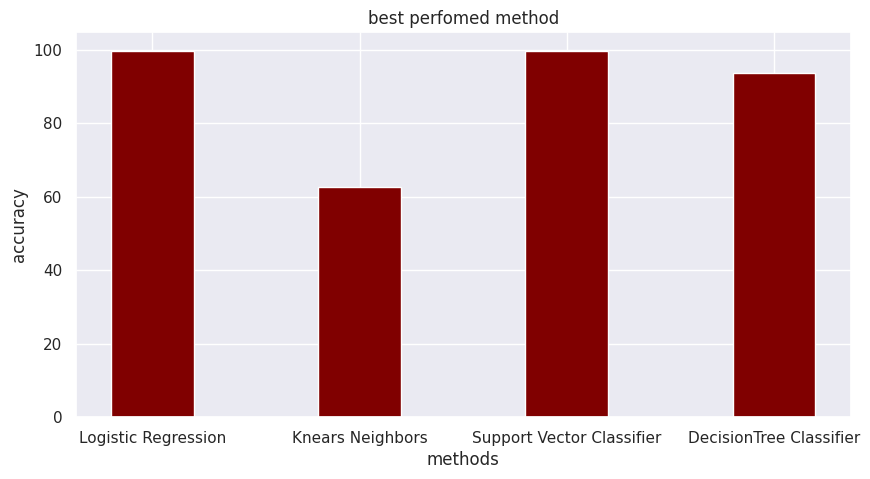

In [1407]:
fig = plt.figure(figsize=(10, 5))

plt.bar(methods, scores, color='maroon', width=0.4)

plt.xlabel('methods')
plt.ylabel('accuracy')
plt.title('best perfomed method')
plt.show()

[Text(0, 0.5, 'placed'), Text(0, 1.5, 'not placed')]

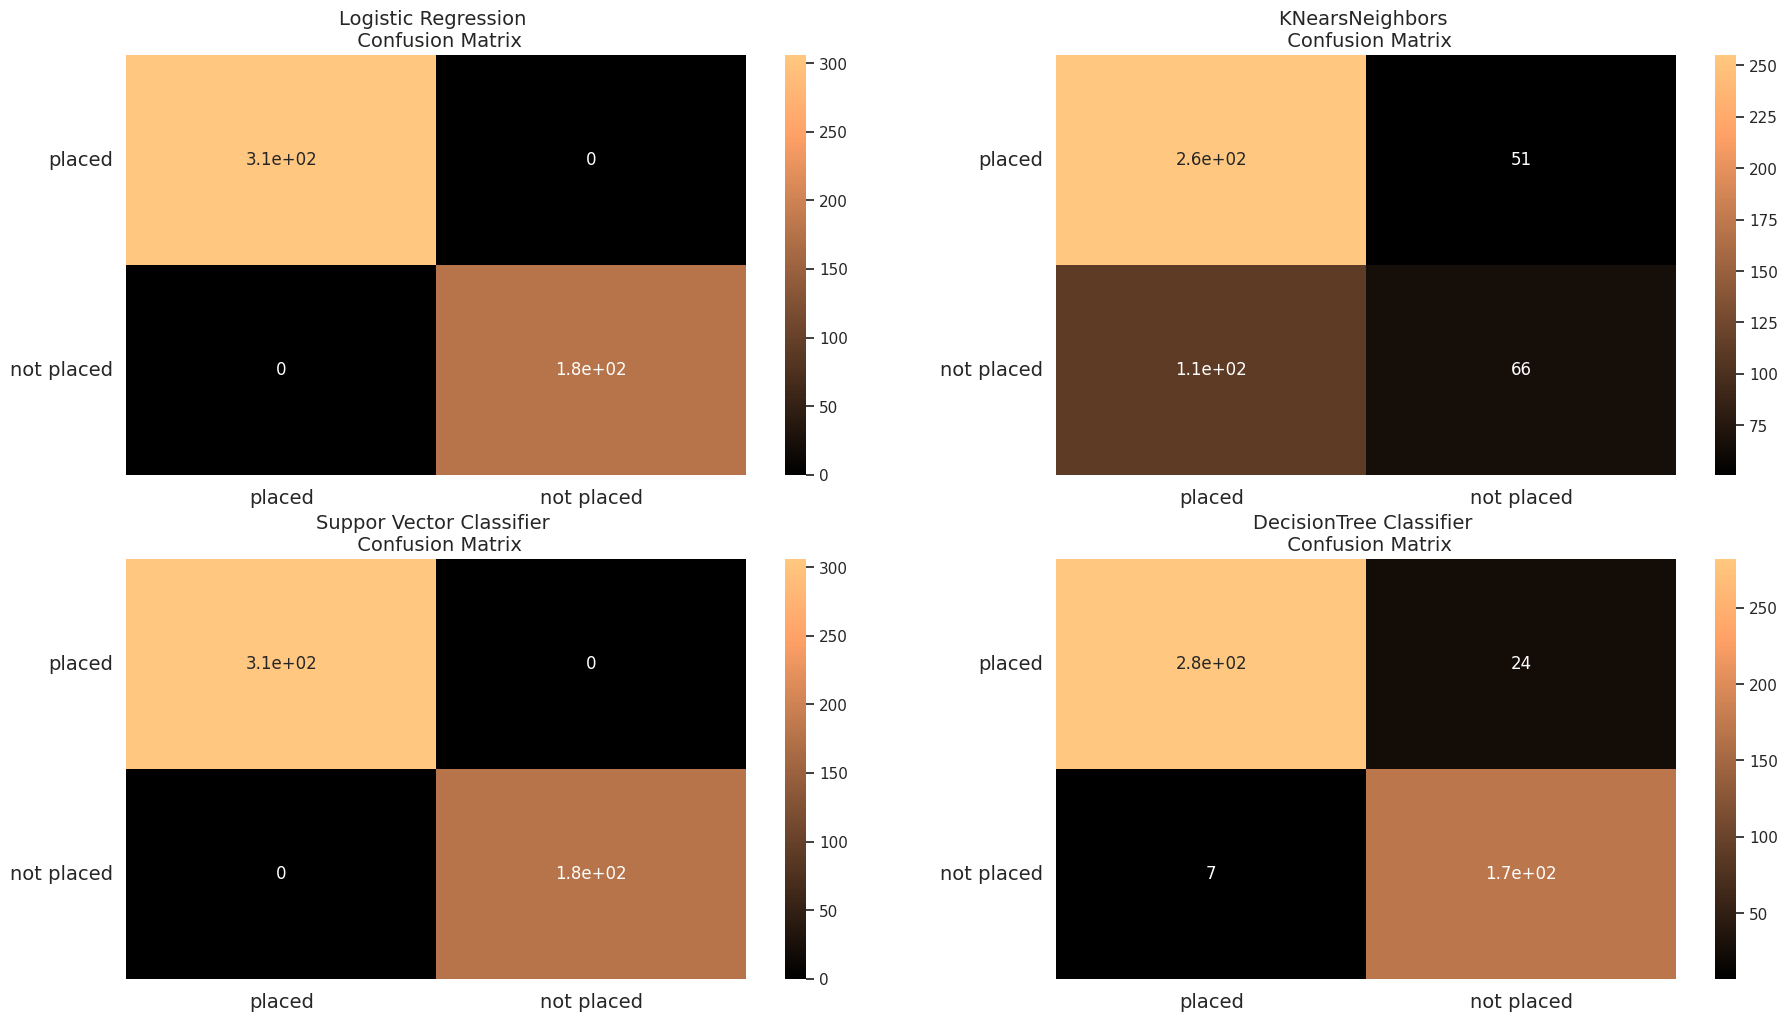

In [1411]:
y_pred_log_reg = log_reg.predict(x_test)


y_pred_knear = knears_neighbors.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_tree = tree_clf.predict(x_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0, 0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

In [1412]:
print('classification report on reg model : ')
print(classification_report(y_test,y_pred_log_reg))
print('\n')
print('classification report on dtree model : ')
print(classification_report(y_test,y_pred_tree))
print('\n')
print('classification report on knn model : ')
print(classification_report(y_test,y_pred_knear))
print('\n')
print('classification report on svm model : ')
print(classification_report(y_test,y_pred_svc))

classification report on reg model : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       177

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



classification report on dtree model : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       306
           1       0.88      0.96      0.92       177

    accuracy                           0.94       483
   macro avg       0.93      0.94      0.93       483
weighted avg       0.94      0.94      0.94       483



classification report on knn model : 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       306
           1       0.56      0.37      0.45       177

    accuracy                           0.66       483
   macro

In [1406]:
print('roc auc score on reg model : ')
print(roc_auc_score(y_test,y_pred_log_reg))
print('\n')
print('roc auc score on dtree model : ')
print(roc_auc_score(y_test,y_pred_tree))
print('\n')
print('roc auc score on knn model : ')
print(roc_auc_score(y_test,y_pred_knear))
print('\n')
print('roc auc score on svm model : ')
print(roc_auc_score(y_test,y_pred_svc))

roc auc score on reg model : 
1.0


roc auc score on dtree model : 
0.9410103024260552


roc auc score on knn model : 
0.6031073446327684


roc auc score on svm model : 
1.0


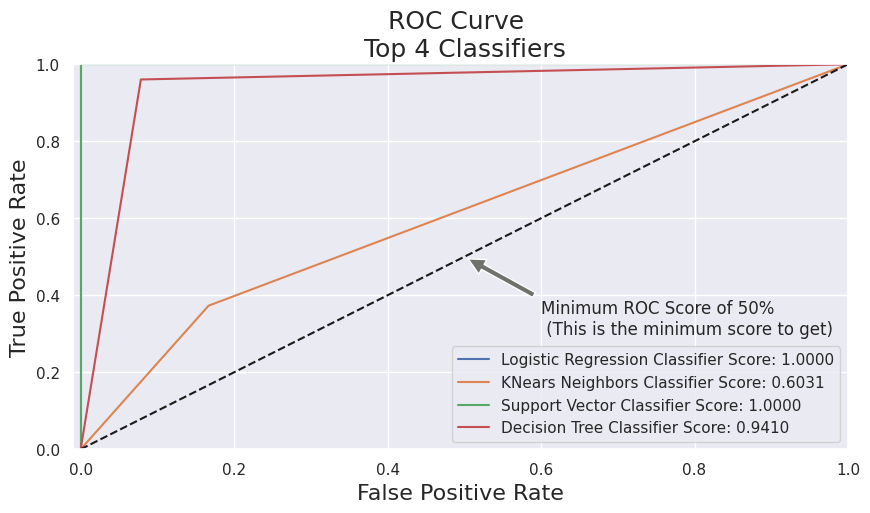

In [1405]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_log_reg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_log_reg)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knear)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [1311]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [1312]:
ns = NearMiss()

In [1329]:
x_train_ns,y_train_ns = ns.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_ns))
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ns)))

Resampled dataset shape Counter({0: 741, 1: 741})
The number of class before fit Counter({0: 1189, 1: 741})
The number of class after fit Counter({0: 741, 1: 741})


<Axes: xlabel='placed', ylabel='program_duration_days'>

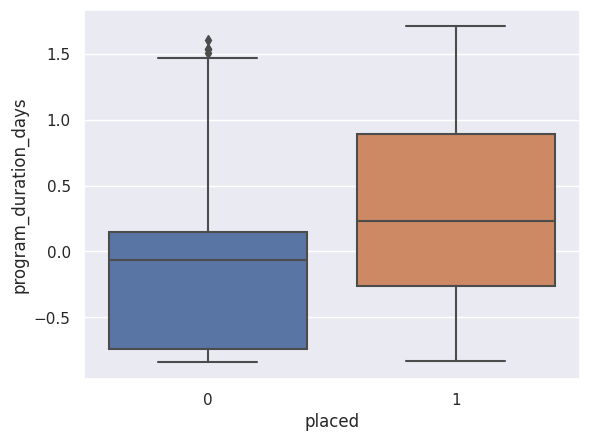

In [1339]:
data_ns = pd.concat([x_train_ns, y_train_ns], axis=1)


sns.boxplot(x='placed', y='program_duration_days', data=data_ns)

In [1342]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train_ns, y_train_ns)
  training_score = cross_val_score(classifier, x_test, y_test, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score


In [1343]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train_ns, y_train_ns)
log_reg = grid_log_reg.best_estimator_

# KNeighborsClassifier model
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train_ns, y_train_ns)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train_ns, y_train_ns)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train_ns, y_train_ns)
tree_clf = grid_tree.best_estimator_

In [1344]:
methods = []
scores = []

log_reg_score = cross_val_score(log_reg, x_test, y_test, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
methods.append('Logistic Regression')
scores.append(round(log_reg_score.mean() * 100, 2))

knears_score = cross_val_score(knears_neighbors, x_test, y_test, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
methods.append('Knears Neighbors')
scores.append(round(knears_score.mean() * 100, 2))

svc_score = cross_val_score(svc, x_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
methods.append('Support Vector Classifier')
scores.append(round(svc_score.mean() * 100, 2))

tree_score = cross_val_score(tree_clf, x_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
methods.append('DecisionTree Classifier')
scores.append(round(tree_score.mean() * 100, 2))

Logistic Regression Cross Validation Score:  99.79%
Knears Neighbors Cross Validation Score 57.76%
Support Vector Classifier Cross Validation Score 99.58%
DecisionTree Classifier Cross Validation Score 93.59%


In [1345]:
print(methods)
print(scores)

['Logistic Regression', 'Knears Neighbors', 'Support Vector Classifier', 'DecisionTree Classifier']
[99.79, 57.76, 99.58, 93.59]


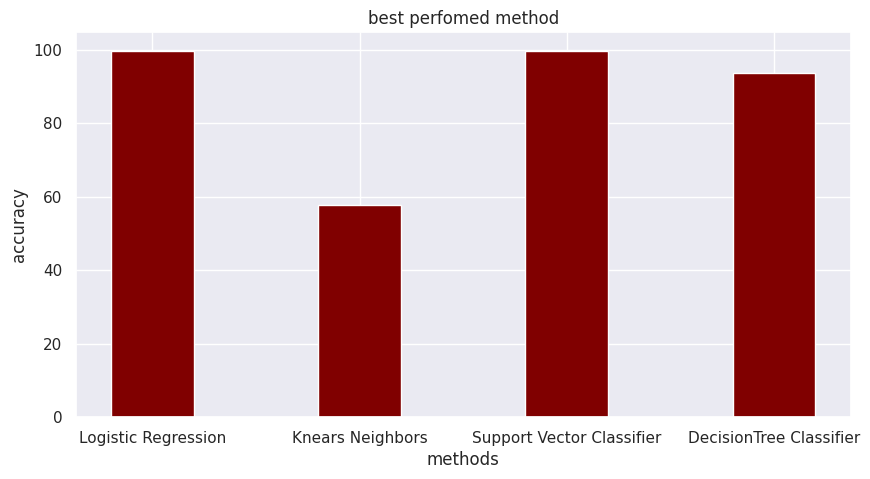

In [1346]:
fig = plt.figure(figsize=(10, 5))

plt.bar(methods, scores, color='maroon', width=0.4)

plt.xlabel('methods')
plt.ylabel('accuracy')
plt.title('best perfomed method')
plt.show()

[Text(0, 0.5, 'placed'), Text(0, 1.5, 'not placed')]

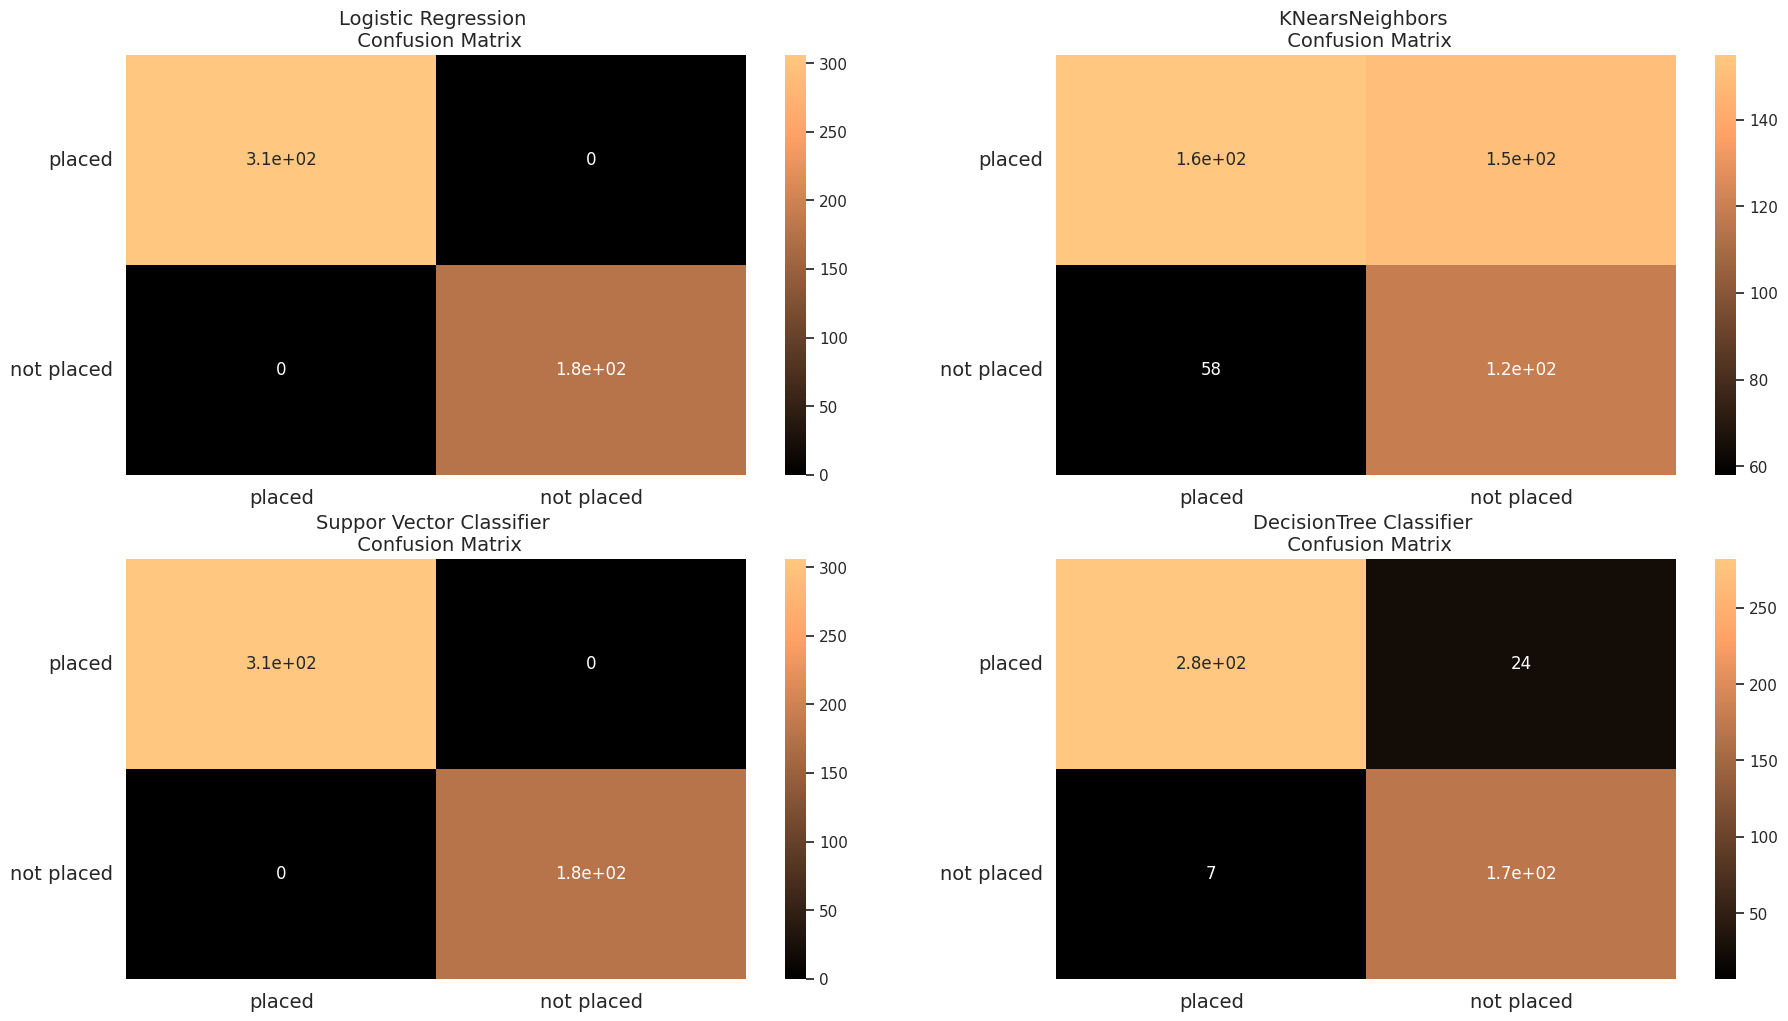

In [1347]:
y_pred_log_reg = log_reg.predict(x_test)


y_pred_knear = knears_neighbors.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_tree = tree_clf.predict(x_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0, 0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

In [1348]:
print('classification report on reg model : ')
print(classification_report(y_test,y_pred_log_reg))
print('\n')
print('classification report on dtree model : ')
print(classification_report(y_test,y_pred_tree))
print('\n')
print('classification report on knn model : ')
print(classification_report(y_test,y_pred_knear))
print('\n')
print('classification report on svm model : ')
print(classification_report(y_test,y_pred_svc))

classification report on reg model : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       177

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



classification report on dtree model : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       306
           1       0.88      0.96      0.92       177

    accuracy                           0.94       483
   macro avg       0.93      0.94      0.93       483
weighted avg       0.94      0.94      0.94       483



classification report on knn model : 
              precision    recall  f1-score   support

           0       0.73      0.51      0.60       306
           1       0.44      0.67      0.53       177

    accuracy                           0.57       483
   macro

In [1358]:
print('roc auc score on reg model : ')
print(roc_auc_score(y_test,y_pred_log_reg))
print('\n')
print('roc auc score on dtree model : ')
print(roc_auc_score(y_test,y_pred_tree))
print('\n')
print('roc auc score on knn model : ')
print(roc_auc_score(y_test,y_pred_knear))
print('\n')
print('roc auc score on svm model : ')
print(roc_auc_score(y_test,y_pred_svc))

roc auc score on reg model : 
1.0


roc auc score on dtree model : 
0.9410103024260552


roc auc score on knn model : 
0.5894261659466047


roc auc score on svm model : 
1.0


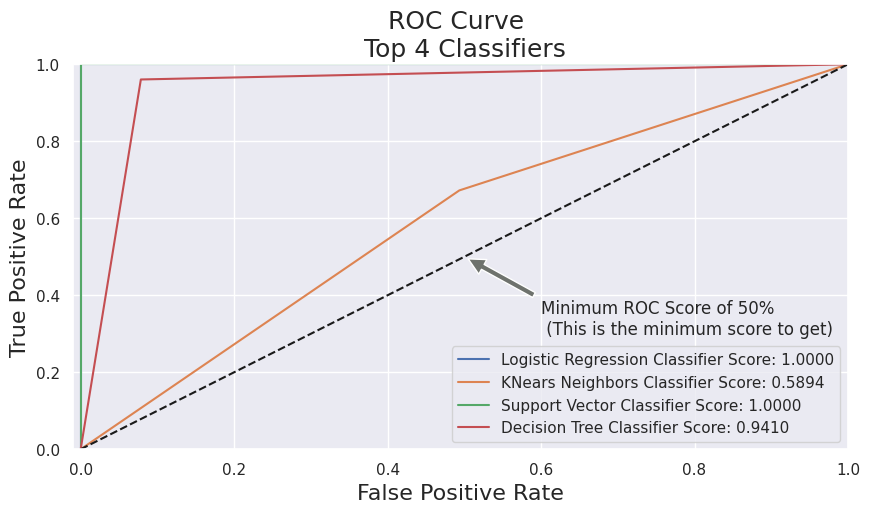

In [1359]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_log_reg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_log_reg)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knear)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [1361]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy='auto')

In [1363]:
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_os))
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_os)))

Resampled dataset shape Counter({0: 1189, 1: 1189})
The number of class before fit Counter({0: 1189, 1: 741})
The number of class after fit Counter({0: 1189, 1: 1189})


<Axes: xlabel='placed', ylabel='program_duration_days'>

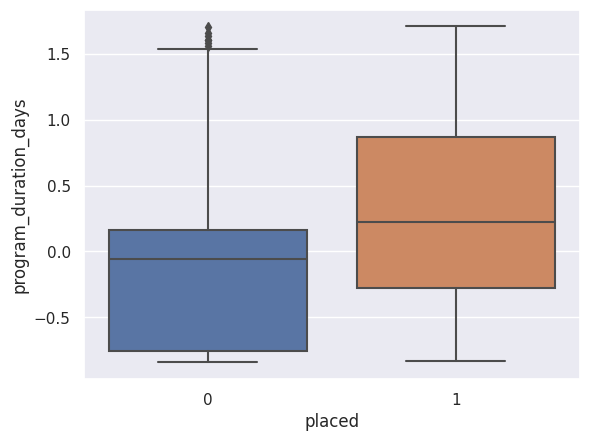

In [1364]:
data_os = pd.concat([x_train_os, y_train_os], axis=1)


sns.boxplot(x='placed', y='program_duration_days', data=data_os)

In [1366]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train_os, y_train_os)
  training_score = cross_val_score(classifier, x_test, y_test, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score


In [1369]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train_os, y_train_os)
log_reg = grid_log_reg.best_estimator_

# KNeighborsClassifier model
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train_os, y_train_os)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train_os, y_train_os)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train_os, y_train_os)
tree_clf = grid_tree.best_estimator_

In [1370]:
methods = []
scores = []

log_reg_score = cross_val_score(log_reg, x_test, y_test, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
methods.append('Logistic Regression')
scores.append(round(log_reg_score.mean() * 100, 2))

knears_score = cross_val_score(knears_neighbors, x_test, y_test, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
methods.append('Knears Neighbors')
scores.append(round(knears_score.mean() * 100, 2))

svc_score = cross_val_score(svc, x_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
methods.append('Support Vector Classifier')
scores.append(round(svc_score.mean() * 100, 2))

tree_score = cross_val_score(tree_clf, x_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
methods.append('DecisionTree Classifier')
scores.append(round(tree_score.mean() * 100, 2))

Logistic Regression Cross Validation Score:  99.79%
Knears Neighbors Cross Validation Score 62.74%
Support Vector Classifier Cross Validation Score 99.58%
DecisionTree Classifier Cross Validation Score 93.59%


In [1371]:
print(methods)
print(scores)

['Logistic Regression', 'Knears Neighbors', 'Support Vector Classifier', 'DecisionTree Classifier']
[99.79, 62.74, 99.58, 93.59]


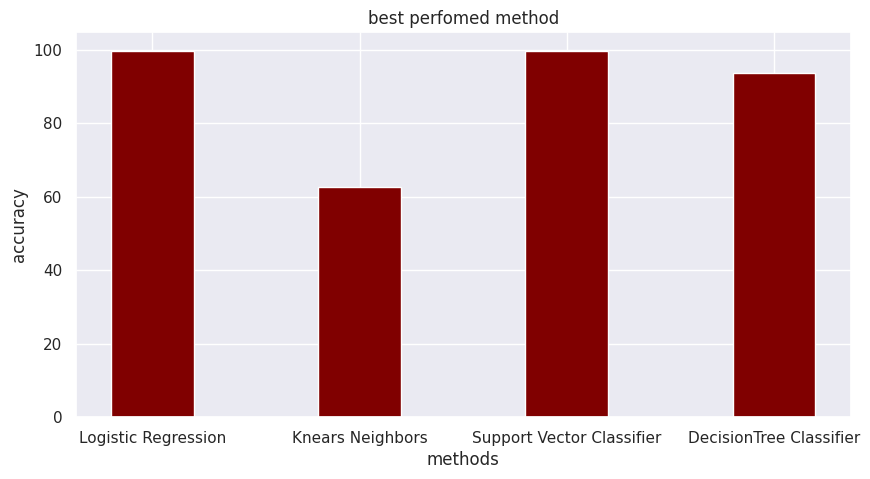

In [1372]:
fig = plt.figure(figsize=(10, 5))

plt.bar(methods, scores, color='maroon', width=0.4)

plt.xlabel('methods')
plt.ylabel('accuracy')
plt.title('best perfomed method')
plt.show()

[Text(0, 0.5, 'placed'), Text(0, 1.5, 'not placed')]

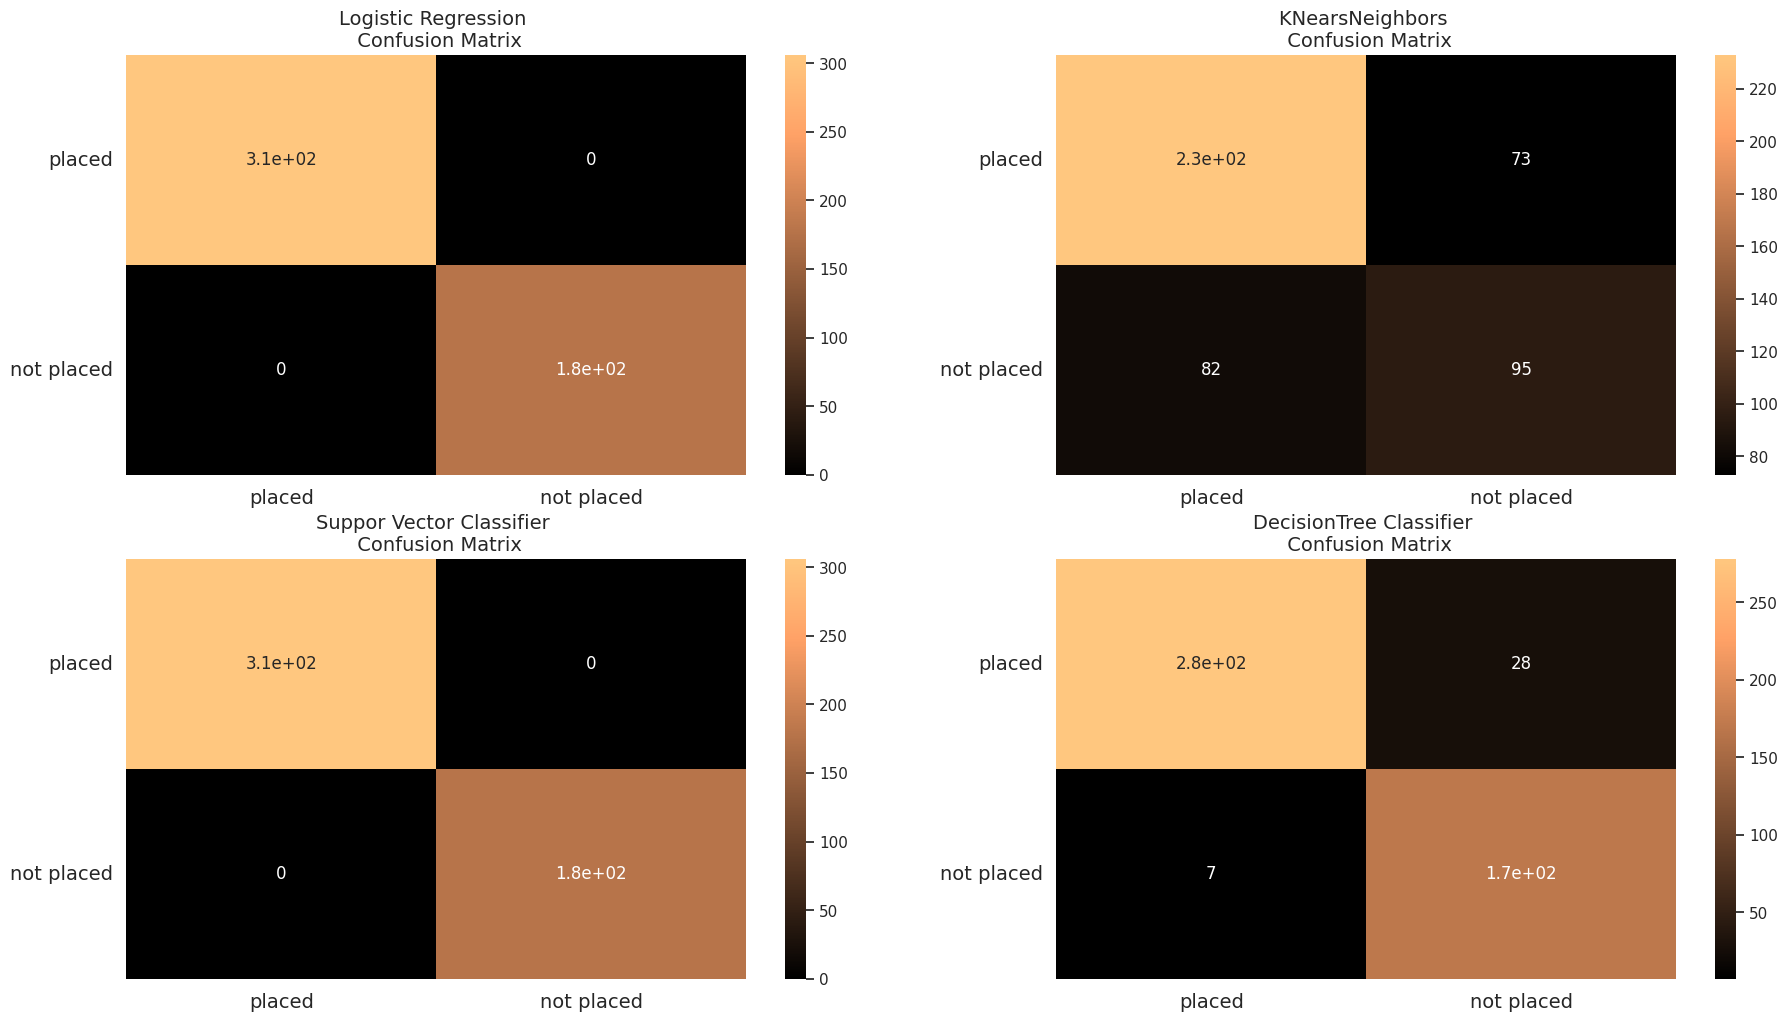

In [1373]:
y_pred_log_reg = log_reg.predict(x_test)


y_pred_knear = knears_neighbors.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_tree = tree_clf.predict(x_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0, 0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

In [1374]:
print('classification report on reg model : ')
print(classification_report(y_test,y_pred_log_reg))
print('\n')
print('classification report on dtree model : ')
print(classification_report(y_test,y_pred_tree))
print('\n')
print('classification report on knn model : ')
print(classification_report(y_test,y_pred_knear))
print('\n')
print('classification report on svm model : ')
print(classification_report(y_test,y_pred_svc))

classification report on reg model : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       177

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



classification report on dtree model : 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       306
           1       0.86      0.96      0.91       177

    accuracy                           0.93       483
   macro avg       0.92      0.93      0.92       483
weighted avg       0.93      0.93      0.93       483



classification report on knn model : 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       306
           1       0.57      0.54      0.55       177

    accuracy                           0.68       483
   macro

In [1375]:
print('roc auc score on reg model : ')
print(roc_auc_score(y_test,y_pred_log_reg))
print('\n')
print('roc auc score on dtree model : ')
print(roc_auc_score(y_test,y_pred_tree))
print('\n')
print('roc auc score on knn model : ')
print(roc_auc_score(y_test,y_pred_knear))
print('\n')
print('roc auc score on svm model : ')
print(roc_auc_score(y_test,y_pred_svc))

roc auc score on reg model : 
1.0


roc auc score on dtree model : 
0.9344743547136369


roc auc score on knn model : 
0.64908053616927


roc auc score on svm model : 
1.0


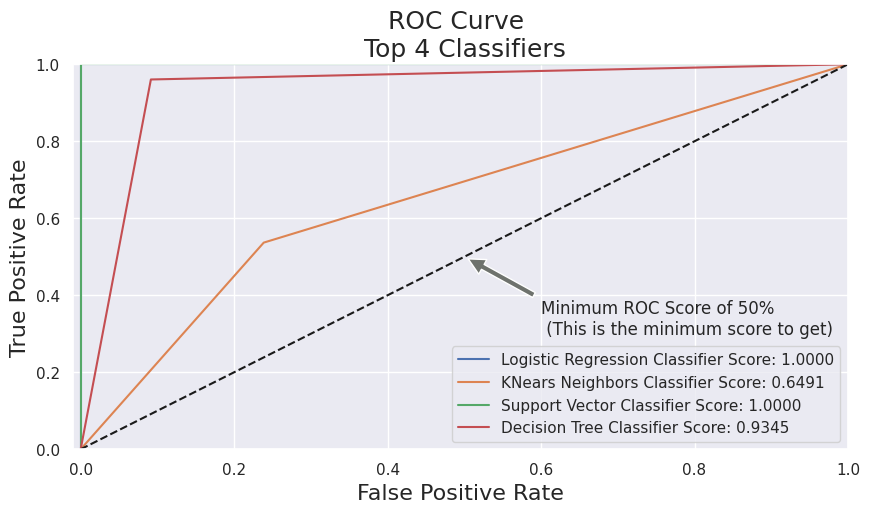

In [1376]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_log_reg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_log_reg)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knear)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [1380]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE

In [1381]:
over_sample = SMOTE()

In [1382]:
x_train_smote,y_train_smote = over_sample.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_smote)))

Resampled dataset shape Counter({0: 1189, 1: 1189})
The number of class before fit Counter({0: 1189, 1: 741})
The number of class after fit Counter({0: 1189, 1: 1189})


<Axes: xlabel='placed', ylabel='program_duration_days'>

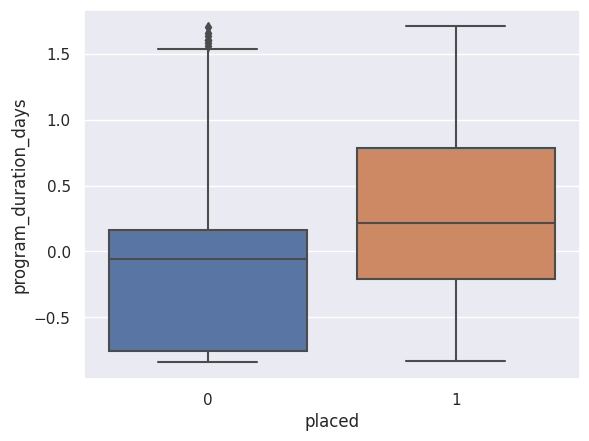

In [1386]:
data_smote = pd.concat([x_train_smote, y_train_smote], axis=1)


sns.boxplot(x='placed', y='program_duration_days', data=data_smote)

In [1387]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train_smote, y_train_smote)
  training_score = cross_val_score(classifier, x_test, y_test, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score


In [1388]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train_smote, y_train_smote)
log_reg = grid_log_reg.best_estimator_

# KNeighborsClassifier model
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train_smote, y_train_smote)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train_smote, y_train_smote)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train_smote, y_train_smote)
tree_clf = grid_tree.best_estimator_

In [1389]:
methods = []
scores = []

log_reg_score = cross_val_score(log_reg, x_test, y_test, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
methods.append('Logistic Regression')
scores.append(round(log_reg_score.mean() * 100, 2))

knears_score = cross_val_score(knears_neighbors, x_test, y_test, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
methods.append('Knears Neighbors')
scores.append(round(knears_score.mean() * 100, 2))

svc_score = cross_val_score(svc, x_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
methods.append('Support Vector Classifier')
scores.append(round(svc_score.mean() * 100, 2))

tree_score = cross_val_score(tree_clf, x_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
methods.append('DecisionTree Classifier')
scores.append(round(tree_score.mean() * 100, 2))

Logistic Regression Cross Validation Score:  99.79%
Knears Neighbors Cross Validation Score 62.74%
Support Vector Classifier Cross Validation Score 99.58%
DecisionTree Classifier Cross Validation Score 93.59%


In [1390]:
print(methods)
print(scores)

['Logistic Regression', 'Knears Neighbors', 'Support Vector Classifier', 'DecisionTree Classifier']
[99.79, 62.74, 99.58, 93.59]


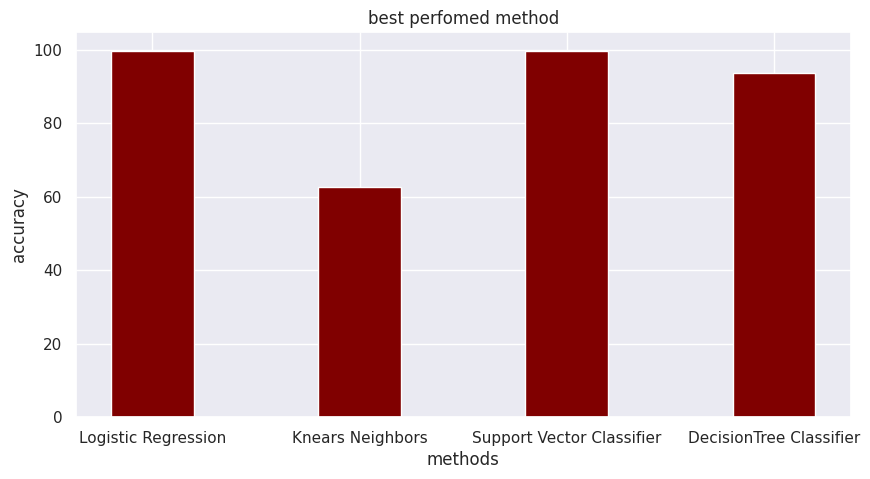

In [1391]:
fig = plt.figure(figsize=(10, 5))

plt.bar(methods, scores, color='maroon', width=0.4)

plt.xlabel('methods')
plt.ylabel('accuracy')
plt.title('best perfomed method')
plt.show()

[Text(0, 0.5, 'placed'), Text(0, 1.5, 'not placed')]

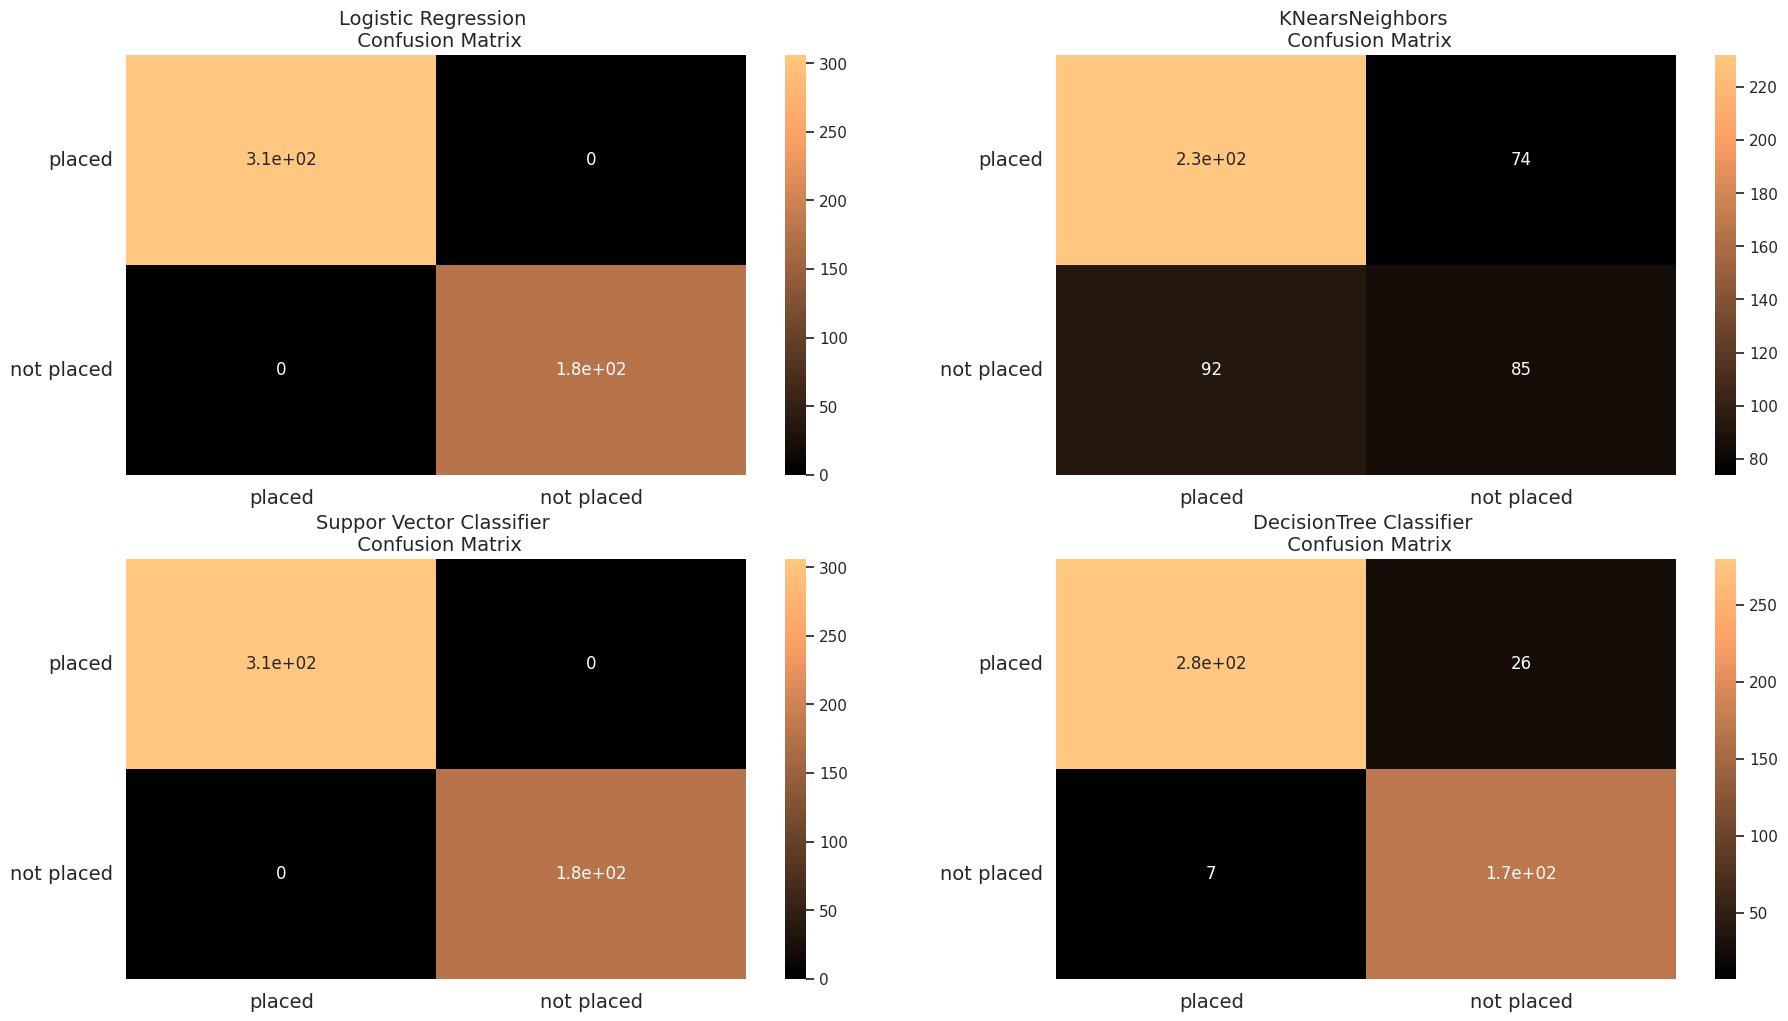

In [1392]:
y_pred_log_reg = log_reg.predict(x_test)


y_pred_knear = knears_neighbors.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_tree = tree_clf.predict(x_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0, 0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[0][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][0].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['placed', 'not placed'], fontsize=14, rotation=0)
ax[1][1].set_yticklabels(['placed', 'not placed'], fontsize=14, rotation=360)

In [1393]:
print('classification report on reg model : ')
print(classification_report(y_test,y_pred_log_reg))
print('\n')
print('classification report on dtree model : ')
print(classification_report(y_test,y_pred_tree))
print('\n')
print('classification report on knn model : ')
print(classification_report(y_test,y_pred_knear))
print('\n')
print('classification report on svm model : ')
print(classification_report(y_test,y_pred_svc))

classification report on reg model : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       177

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



classification report on dtree model : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.94       306
           1       0.87      0.96      0.91       177

    accuracy                           0.93       483
   macro avg       0.92      0.94      0.93       483
weighted avg       0.94      0.93      0.93       483



classification report on knn model : 
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       306
           1       0.53      0.48      0.51       177

    accuracy                           0.66       483
   macro

In [1394]:
print('roc auc score on reg model : ')
print(roc_auc_score(y_test,y_pred_log_reg))
print('\n')
print('roc auc score on dtree model : ')
print(roc_auc_score(y_test,y_pred_tree))
print('\n')
print('roc auc score on knn model : ')
print(roc_auc_score(y_test,y_pred_knear))
print('\n')
print('roc auc score on svm model : ')
print(roc_auc_score(y_test,y_pred_svc))

roc auc score on reg model : 
1.0


roc auc score on dtree model : 
0.937742328569846


roc auc score on knn model : 
0.6191979616705439


roc auc score on svm model : 
1.0


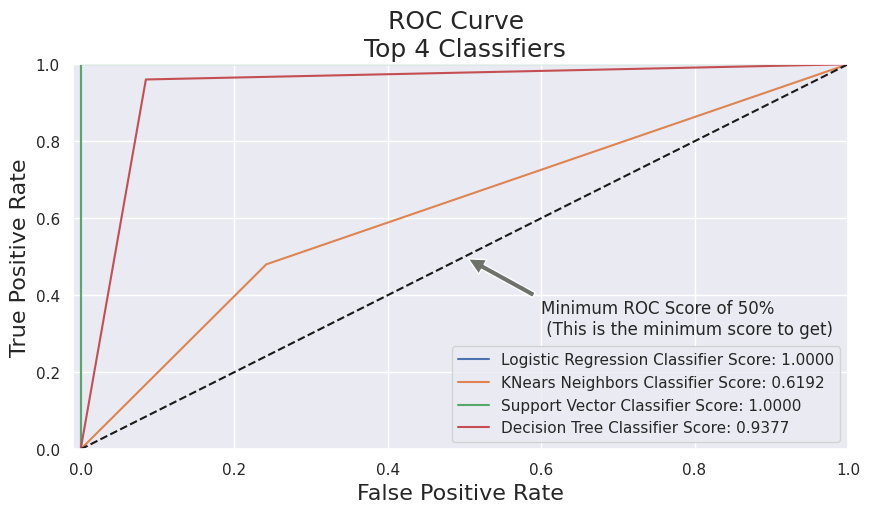

In [1395]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_log_reg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_log_reg)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knear)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()